<a href="https://colab.research.google.com/github/VamK2/Data-Science-Machine-Learning/blob/main/VamsiK2_Credit_Card_Users_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Users Churn Prediction**

# **Solution Approach / Methodology**


---


**Develop a Classification Model:** Construct a model that can assist the business in predicting customer retention strategies.

**Identify Key Features:** Determine the most significant features of the models that contribute to their predictive power.



**Model Construction:** Develop various models such as Bagging, Boosting, Random Forest, AdaBoost, Gradient Boosting, and XGBClassifier using undersampling and oversampling techniques.

**Feature Importance Analysis:** Generate a report on the most important features of each model’s findings.

**Final Predictions and Recommendations:** Provide the final predictions, insights, and recommendations on strategies to retain customers based on the model’s results.


# **Problem Statement**

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [ ]:
# uncomment and run the next line in case Jupyter Notebook IDE is being used
!pip install imblearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
churn = pd.read_csv("/content/drive/Supervised Learning Credit Card Users Churn Prediction/BankChurners.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
churn.shape ##  Code to view dimensions of the train data

(10127, 21)

In [ ]:
# let's create a copy of the data
data = churn.copy()

### Displaying the first few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
data.head(5) ##  Code to view top 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
pd.options.display.max_rows = None
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# let's view the last 5 rows of the data
data.tail (5) ##  Code to view last 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum() ##  Code to check duplicate entries in the data

0

In [ ]:
# check duplicated count
data.duplicated().sum().sum()

0

### Checking for missing values

In [ ]:
# let's check for missing values in the data
data.isna().sum() ##  Code to check missing entries in the train data

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# null_data = data[data.isnull().any(axis=1)]
# print(null_data) #print out the rows of your DataFrame where there are null values, to see exactly where the missing data is.

In [ ]:
# To get count of total missing values in dataframe
data.isna().sum().sum()

2268

### Statistical summary of the dataset

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T ##  Code to print the statitical summary of the train data

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
data[['Education_Level', 'Marital_Status']].describe(include=["object"]).T # Describe specific columns of interest

,count,unique,top,freq
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687


In [ ]:
data.describe(include=["int64"]).T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Total_Trans_Amt,10127.000,4404.086,3397.129,510.000,2155.500,3899.000,4741.000,18484.000
Total_Trans_Ct,10127.000,64.859,23.473,10.000,45.000,67.000,81.000,139.000


In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
data.shape

(10127, 20)

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Customer_Age`

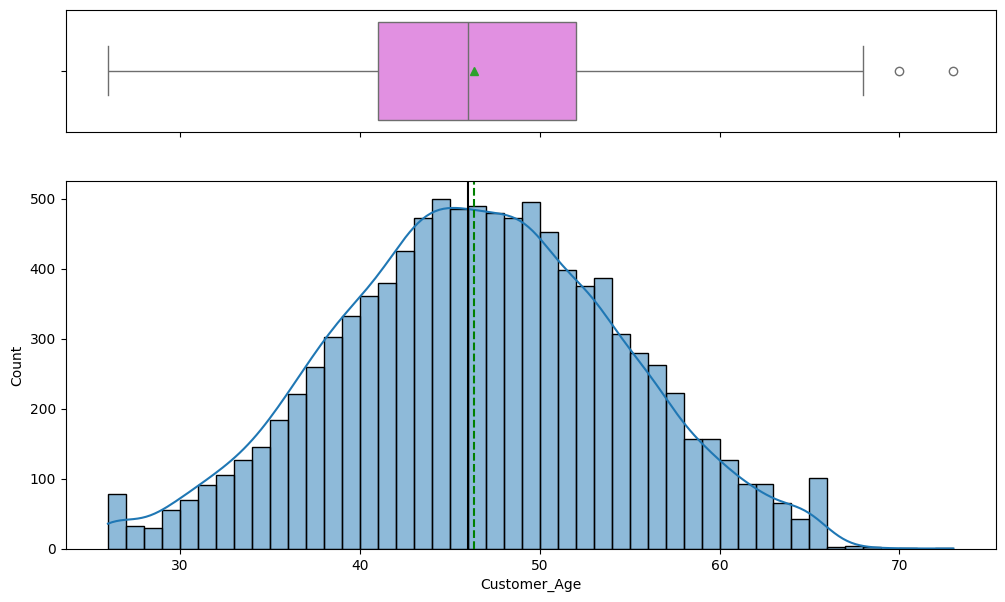

In [ ]:
histogram_boxplot(data, "Customer_Age", kde=True)

`Months_on_book`

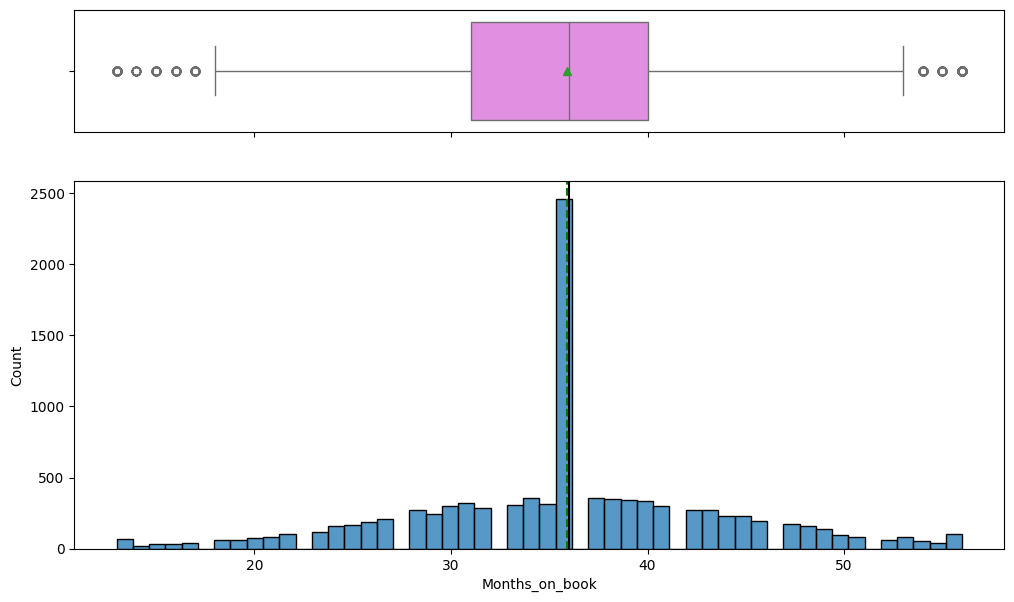

In [ ]:
histogram_boxplot(data, 'Months_on_book')  ## Code to create histogram_boxplot for 'New_Price'

`Credit_Limit`

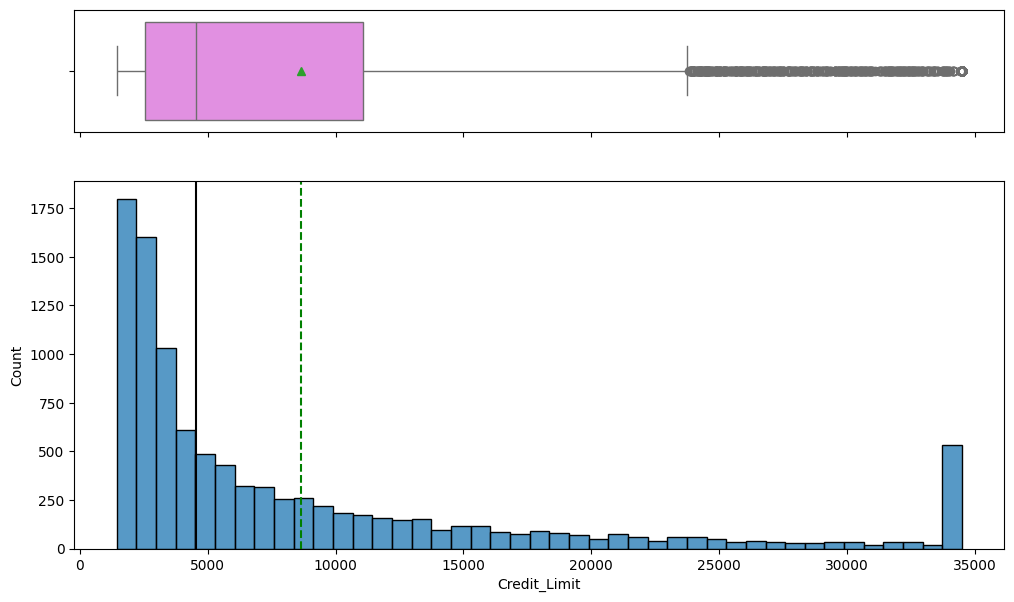

In [ ]:
histogram_boxplot(data,'Credit_Limit')  ## Code to create histogram_boxplot for 'New_Price'

`Total_Revolving_Bal`

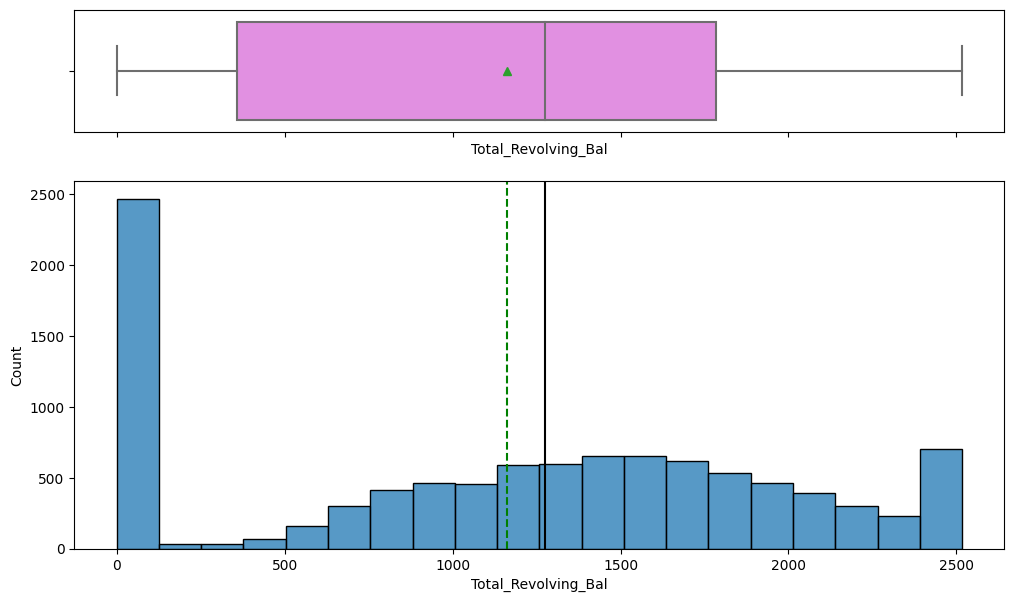

In [ ]:
histogram_boxplot(data, 'Total_Revolving_Bal')  ## Code to create histogram_boxplot for 'New_Price'

`Avg_Open_To_Buy`

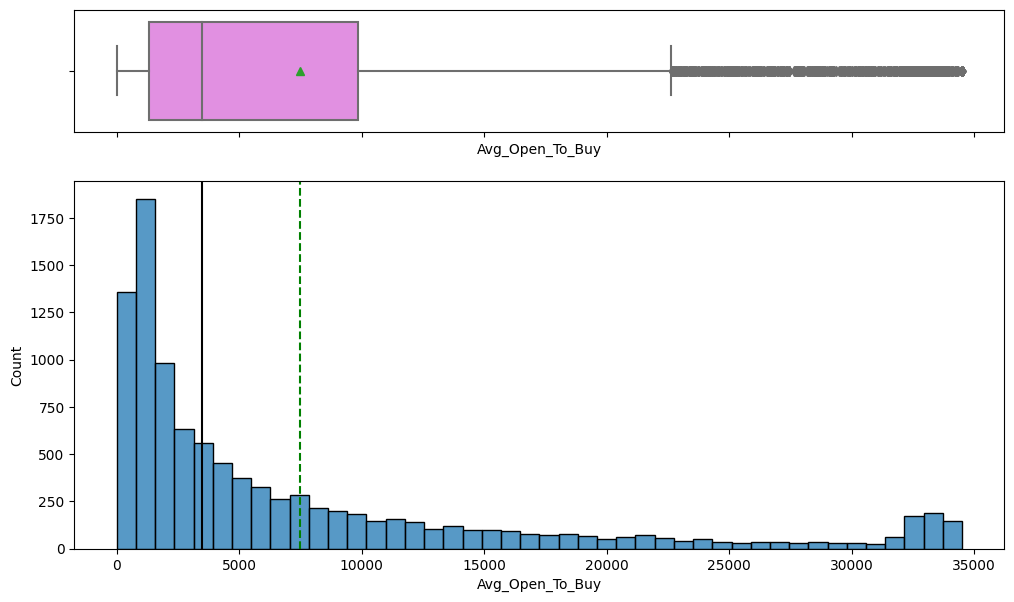

In [ ]:
histogram_boxplot(data,'Avg_Open_To_Buy')  ## Code to create histogram_boxplot for 'New_Price'

`Total_Trans_Ct`

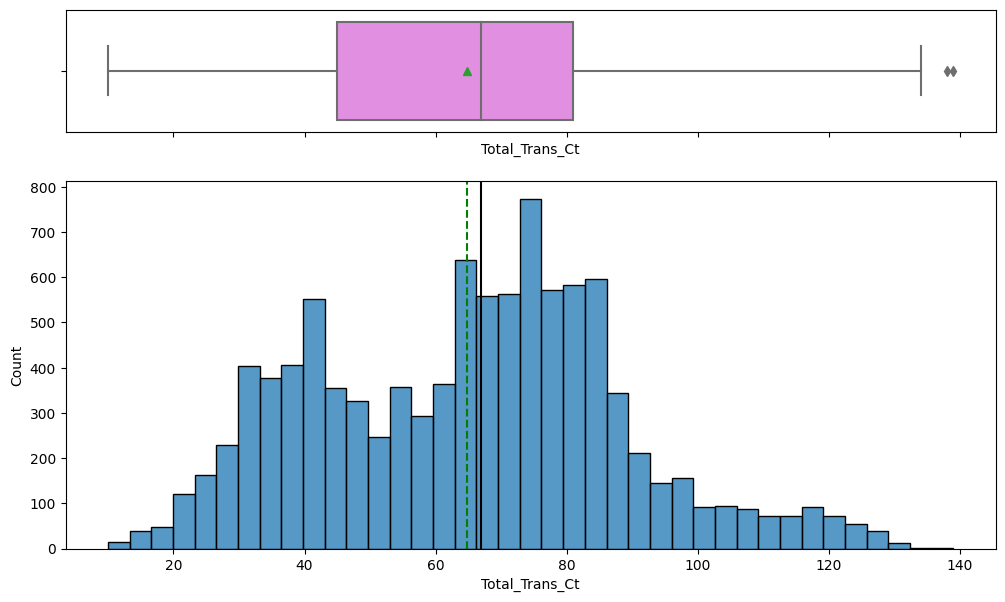

In [ ]:
histogram_boxplot(data,'Total_Trans_Ct')  ## Code to create histogram_boxplot for 'New_Price'

`Total_Amt_Chng_Q4_Q1`

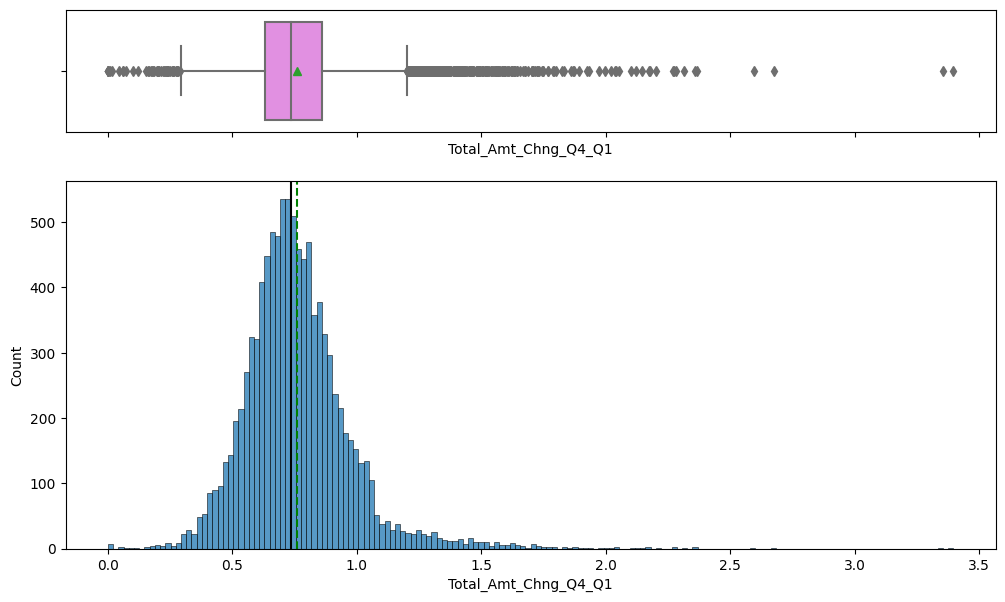

In [ ]:
histogram_boxplot(data,'Total_Amt_Chng_Q4_Q1')  ## Code to create histogram_boxplot for 'New_Price'

**Let's see total transaction amount distributed**

`Total_Trans_Amt`

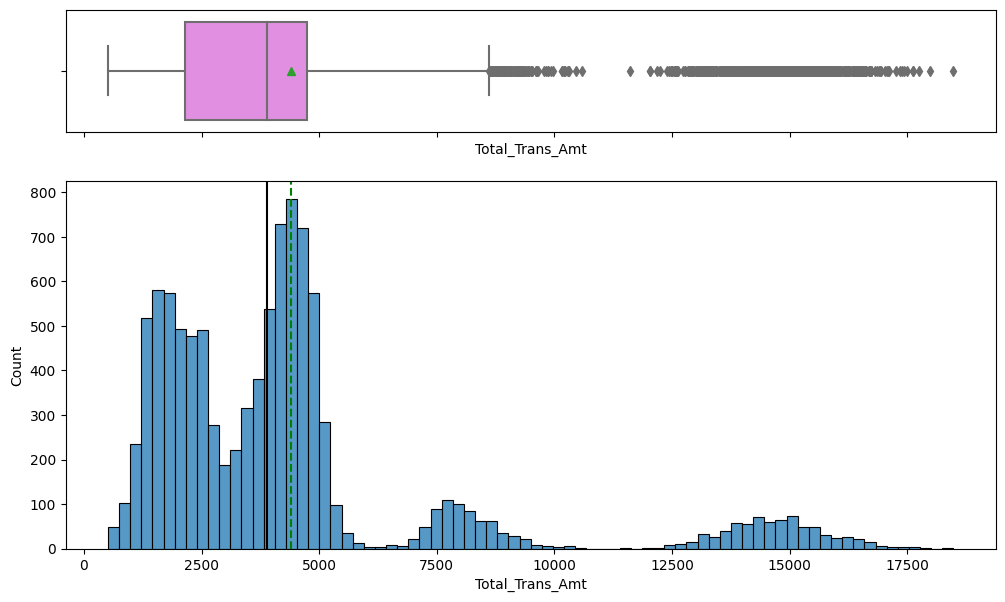

In [ ]:
histogram_boxplot(data, 'Total_Trans_Amt')  ## Code to create histogram_boxplot for 'New_Price'

`Total_Ct_Chng_Q4_Q1`

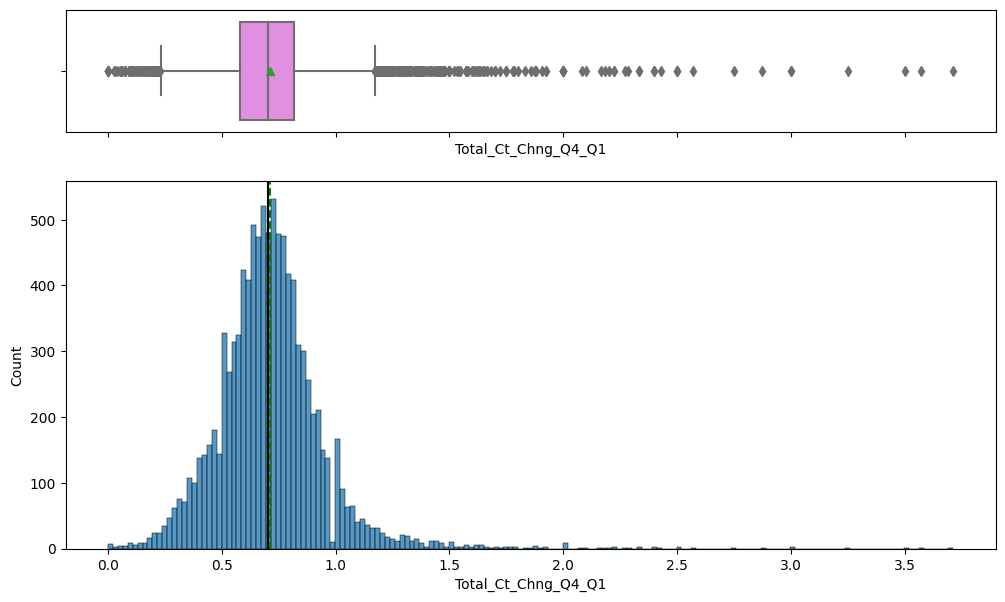

In [ ]:
histogram_boxplot(data, 'Total_Ct_Chng_Q4_Q1')   ## Code to create histogram_boxplot for 'New_Price'

`Avg_Utilization_Ratio`

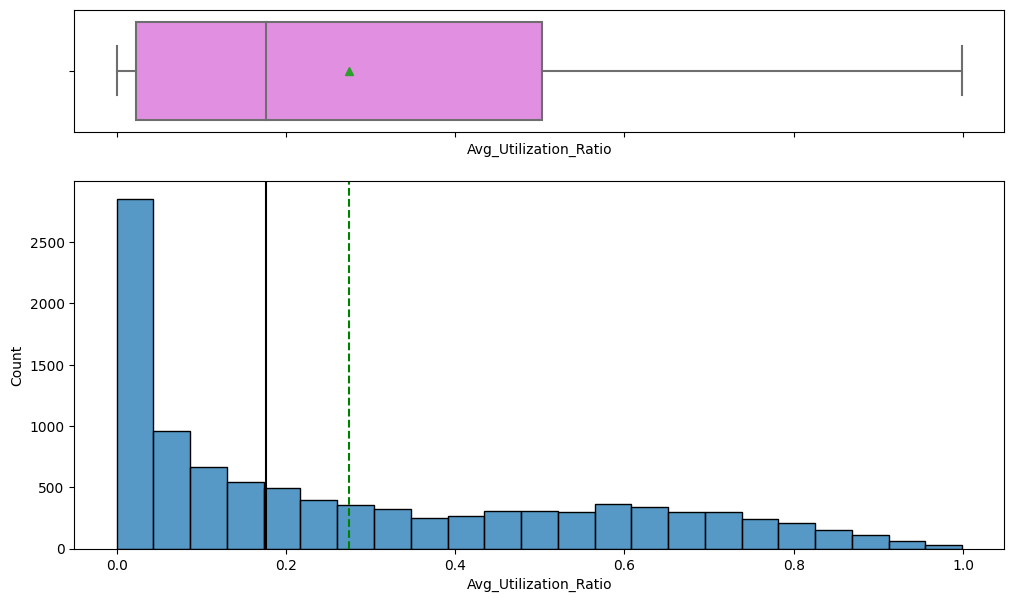

In [ ]:
histogram_boxplot(data, 'Avg_Utilization_Ratio')  ## Code to create histogram_boxplot for 'New_Price'

`Dependent_count`

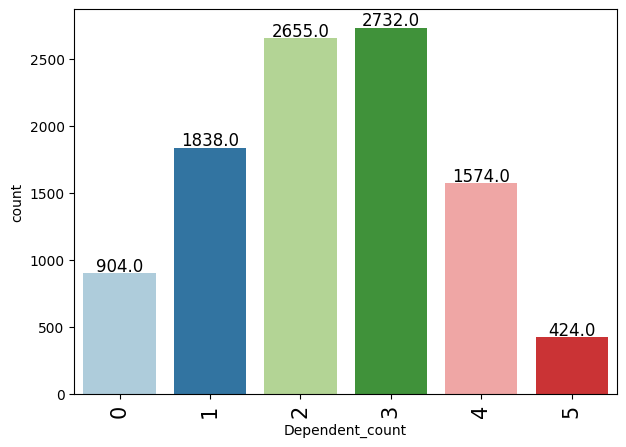

In [ ]:
labeled_barplot(data, "Dependent_count")

`Total_Relationship_Count`

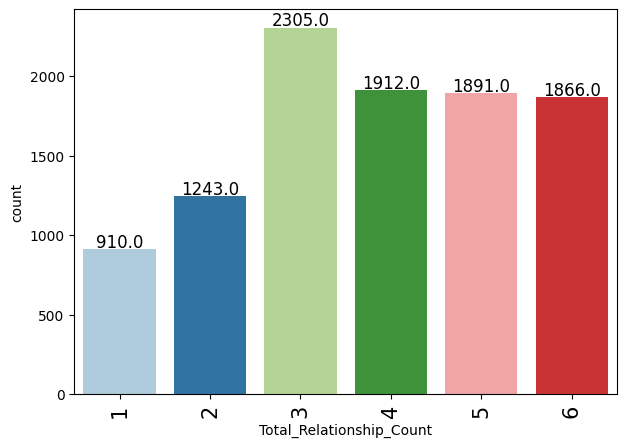

In [ ]:
labeled_barplot(data,'Total_Relationship_Count') ## Code to create labeled_barplot for 'Total_Relationship_Count'

`Months_Inactive_12_mon`

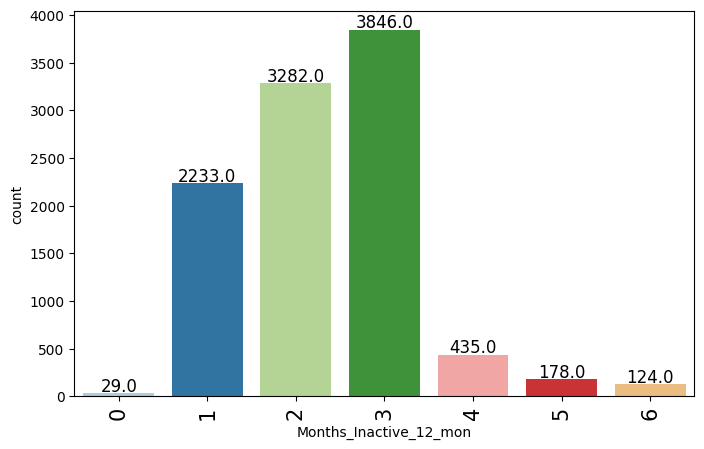

In [ ]:
labeled_barplot(data,'Months_Inactive_12_mon') ## Code to create labeled_barplot for 'Months_Inactive_12_mon'

`Contacts_Count_12_mon`

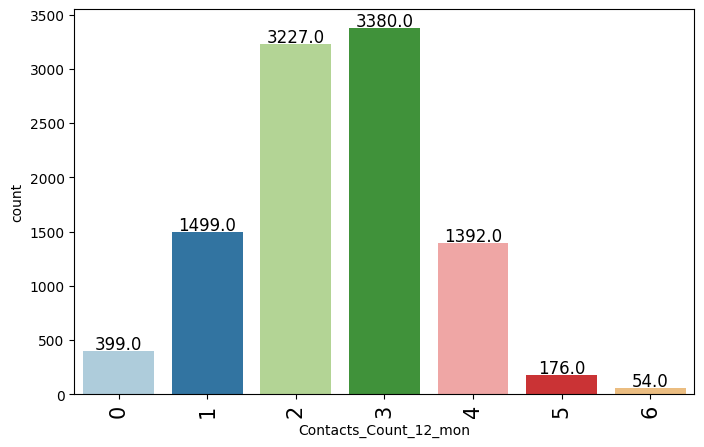

In [ ]:
labeled_barplot(data,'Contacts_Count_12_mon') ## Code to create labeled_barplot for 'Contacts_Count_12_mon'

`Gender`

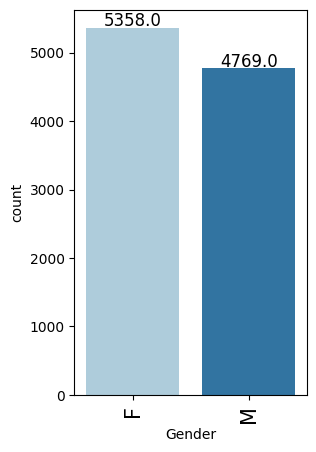

In [ ]:
labeled_barplot(data, 'Gender') ## Code to create labeled_barplot for 'Gender'

**Let's see the distribution of the level of education of customers**

`Education_Level`

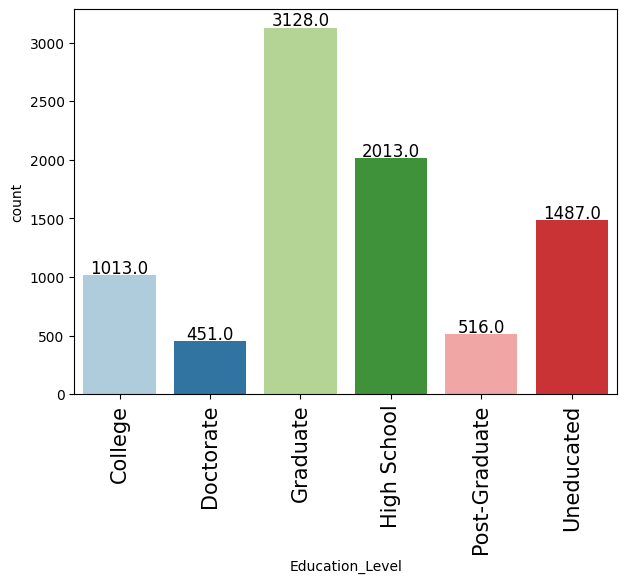

In [ ]:
labeled_barplot(data, 'Education_Level') ## Code to create labeled_barplot for 'Education_Level'

`Marital_Status`

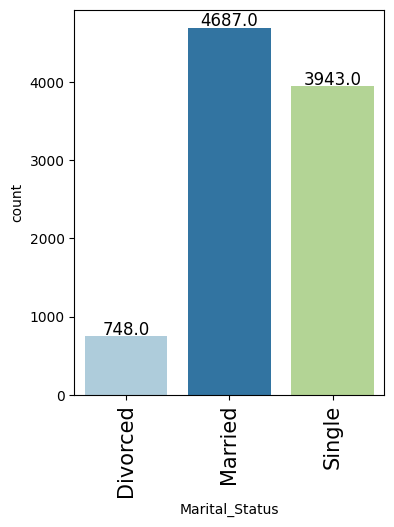

In [ ]:
labeled_barplot(data,'Marital_Status') ## Code to create labeled_barplot for 'Marital_Status'

**Let's see the distribution of the level of income of customers**

`Income_Category`

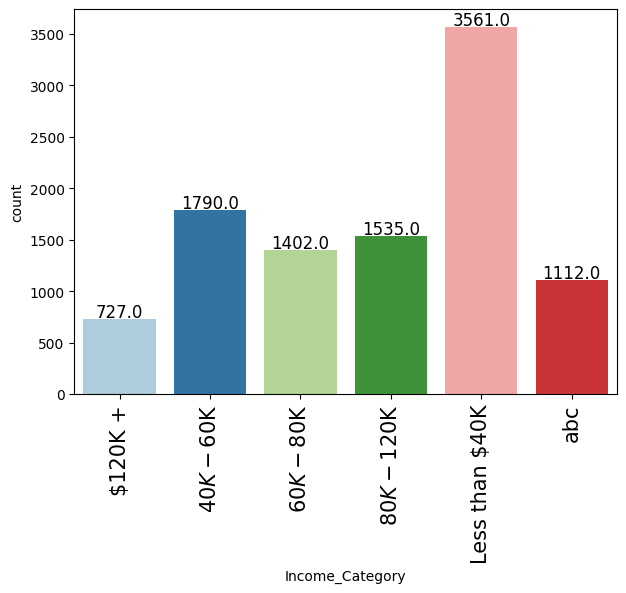

In [ ]:
labeled_barplot(data, 'Income_Category') ## Code to create labeled_barplot for 'Income_Category'

`Card_Category`

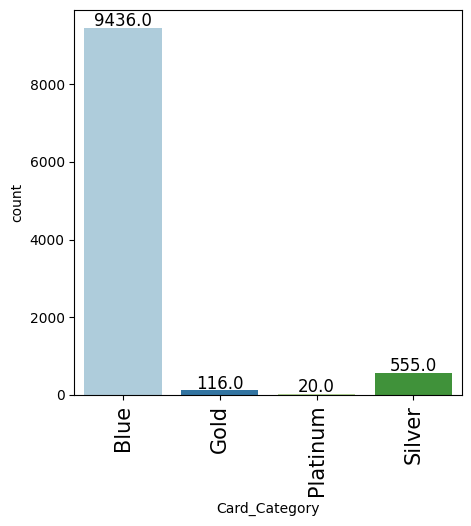

In [ ]:
labeled_barplot(data, 'Card_Category') ## Code to create labeled_barplot for 'Card_Category'

`Attrition_Flag`

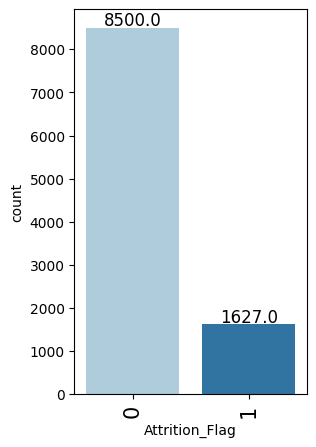

In [ ]:
labeled_barplot(data, 'Attrition_Flag') ## Code to create labeled_barplot for 'Attrition_Flag'

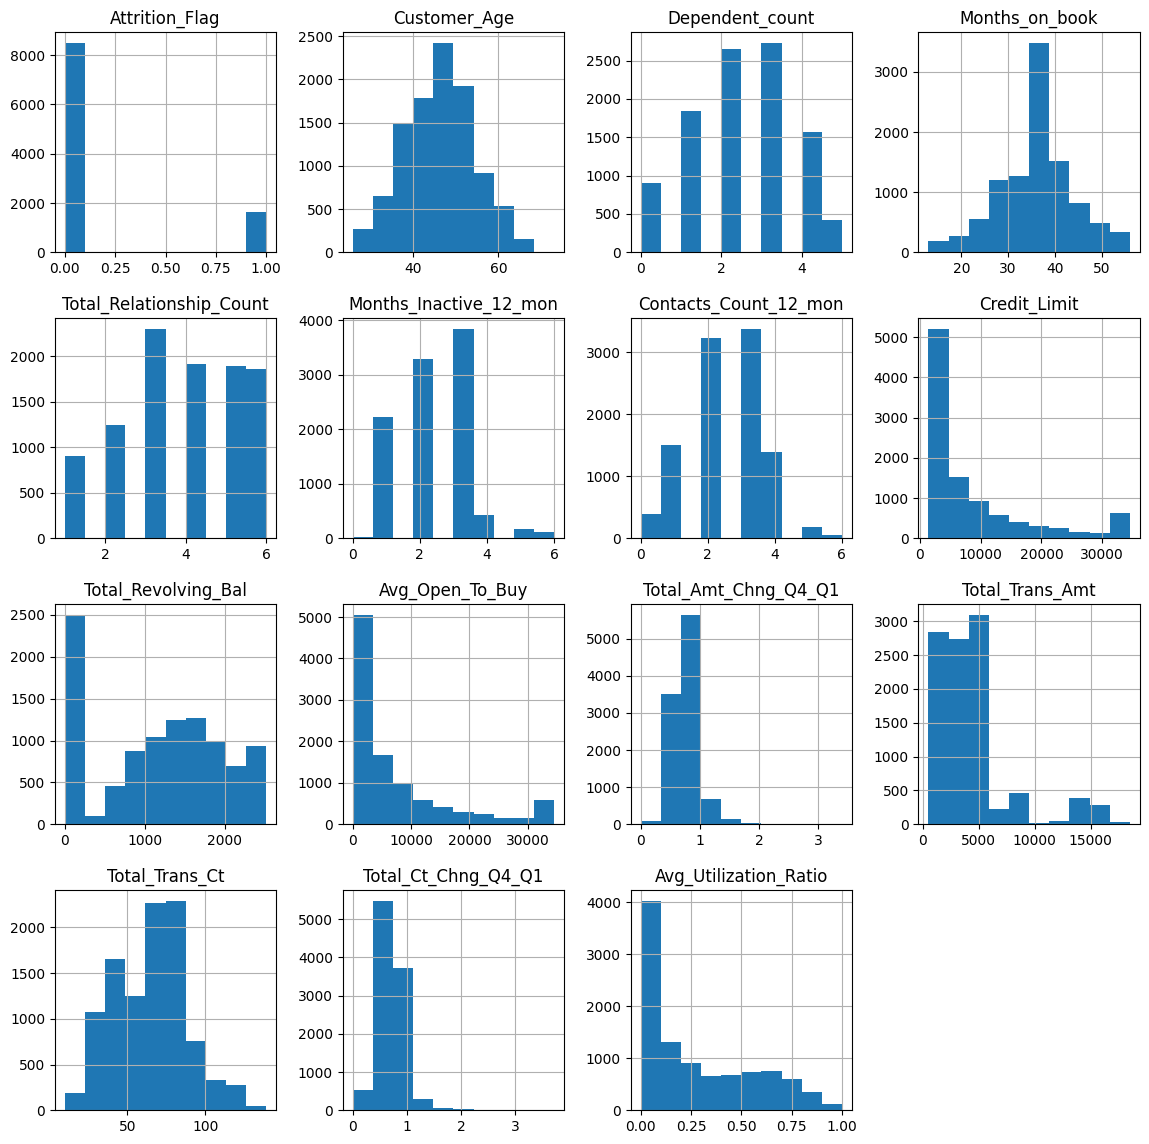

In [ ]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

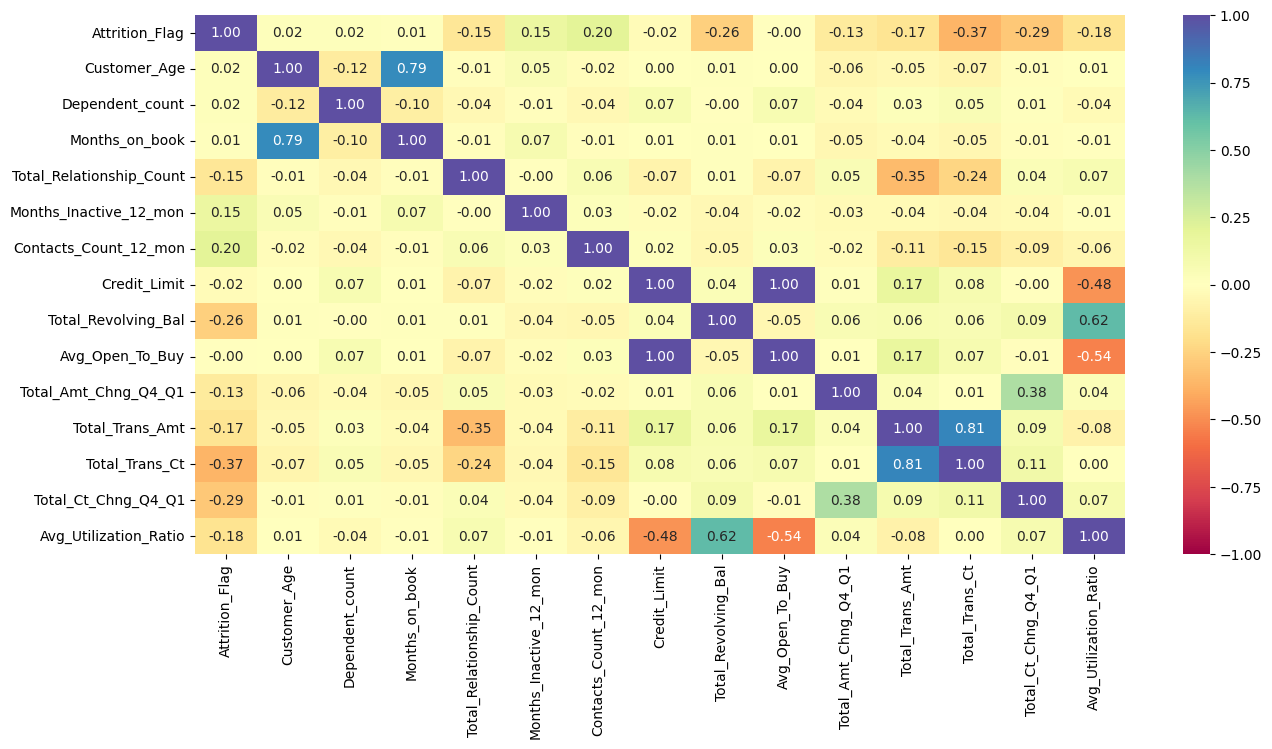

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


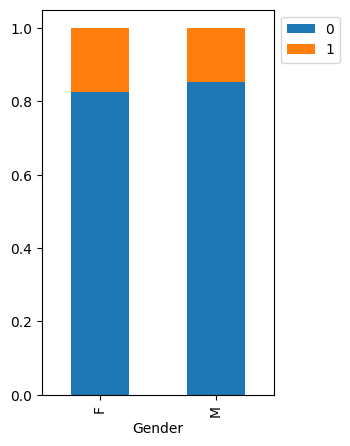

In [ ]:
stacked_barplot(data, "Gender", "Attrition_Flag")

`Attrition_Flag vs Marital_Status`

Marital_Status  Divorced  Married  Single   All
Attrition_Flag                                 
All                  748     4687    3943  9378
0                    627     3978    3275  7880
1                    121      709     668  1498
------------------------------------------------------------------------------------------------------------------------


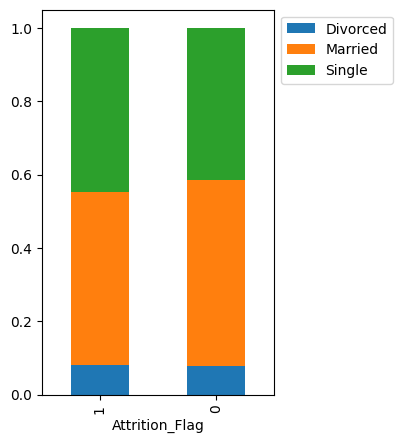

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Marital_Status") ## Code to create distribution_plot for Attrition_Flag vs Marital_Status

`Attrition_Flag vs Education_Level`

Education_Level  College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                              
All                 1013        451      3128         2013            516   
0                    859        356      2641         1707            424   
1                    154         95       487          306             92   

Education_Level  Uneducated   All  
Attrition_Flag                     
All                    1487  8608  
0                      1250  7237  
1                       237  1371  
------------------------------------------------------------------------------------------------------------------------


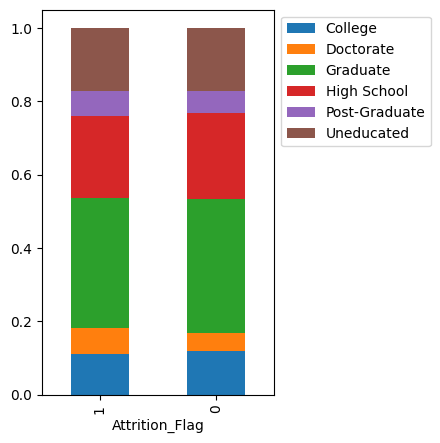

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Education_Level") ## Code to create distribution_plot for Attrition_Flag vs Education_Level

`Attrition_Flag vs Income_Category`

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Attrition_Flag                                                     
All                  727         1790         1402          1535   
0                    601         1519         1213          1293   
1                    126          271          189           242   

Income_Category  Less than $40K   abc    All  
Attrition_Flag                                
All                        3561  1112  10127  
0                          2949   925   8500  
1                           612   187   1627  
------------------------------------------------------------------------------------------------------------------------


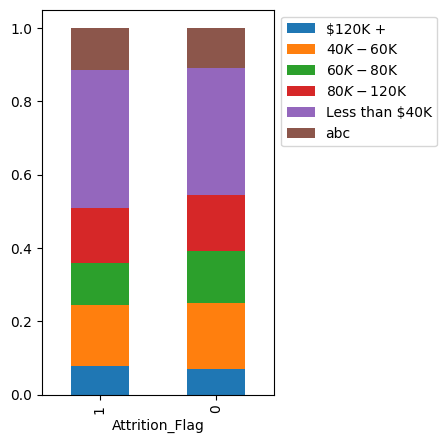

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Income_Category") ## Code to create distribution_plot for Attrition_Flag vs Income_Category

`Attrition_Flag vs Contacts_Count_12_mon`

Contacts_Count_12_mon    0     1     2     3     4    5   6    All
Attrition_Flag                                                    
1                        7   108   403   681   315   59  54   1627
All                    399  1499  3227  3380  1392  176  54  10127
0                      392  1391  2824  2699  1077  117   0   8500
------------------------------------------------------------------------------------------------------------------------


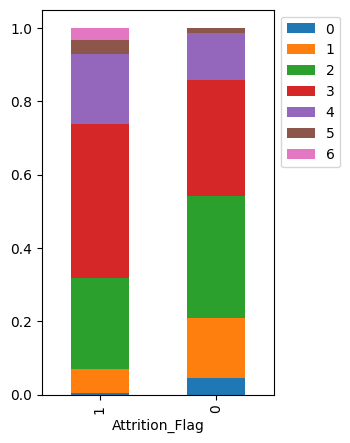

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Contacts_Count_12_mon") ## Code to create distribution_plot for Attrition_Flag vs Income_Category

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Months_Inactive_12_mon   0     1     2     3    4    5    6    All
Attrition_Flag                                                    
All                     29  2233  3282  3846  435  178  124  10127
1                       15   100   505   826  130   32   19   1627
0                       14  2133  2777  3020  305  146  105   8500
------------------------------------------------------------------------------------------------------------------------


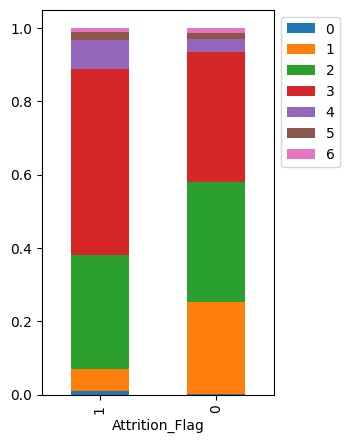

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Months_Inactive_12_mon") ## Code to create distribution_plot for Attrition_Flag vs Months_Inactive_12_mon

`Attrition_Flag vs Total_Relationship_Count`

Total_Relationship_Count    1     2     3     4     5     6    All
Attrition_Flag                                                    
All                       910  1243  2305  1912  1891  1866  10127
0                         677   897  1905  1687  1664  1670   8500
1                         233   346   400   225   227   196   1627
------------------------------------------------------------------------------------------------------------------------


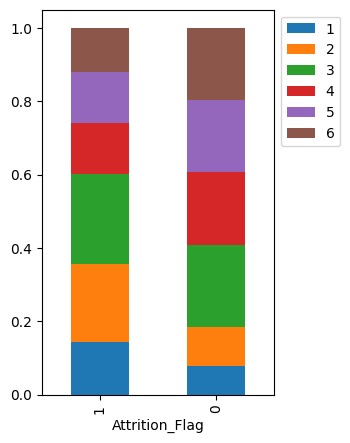

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Total_Relationship_Count") ## Code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count

`Attrition_Flag vs Dependent_count`

Dependent_count    0     1     2     3     4    5    All
Attrition_Flag                                          
All              904  1838  2655  2732  1574  424  10127
0                769  1569  2238  2250  1314  360   8500
1                135   269   417   482   260   64   1627
------------------------------------------------------------------------------------------------------------------------


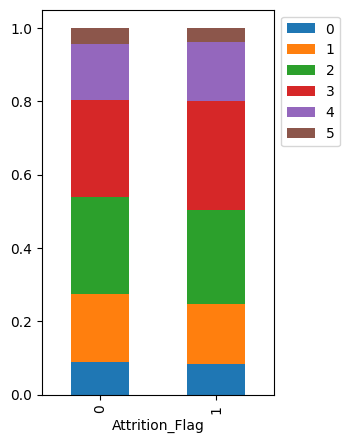

In [ ]:
stacked_barplot(data,"Attrition_Flag", "Dependent_count") ## Code to create distribution_plot for Attrition_Flag vs Dependent_count

`Total_Revolving_Bal` vs `Attrition_Flag`

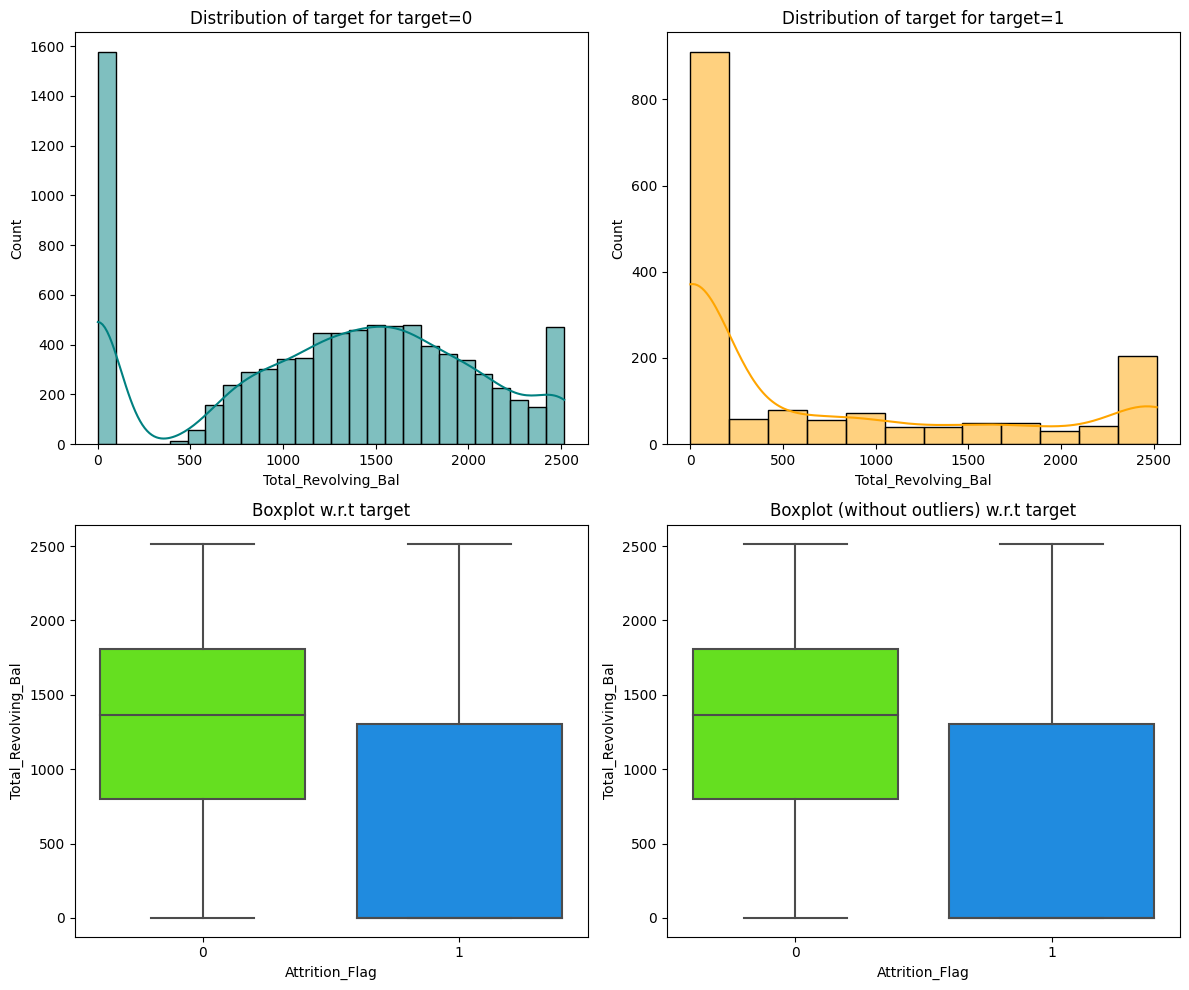

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

`Attrition_Flag vs Credit_Limit`

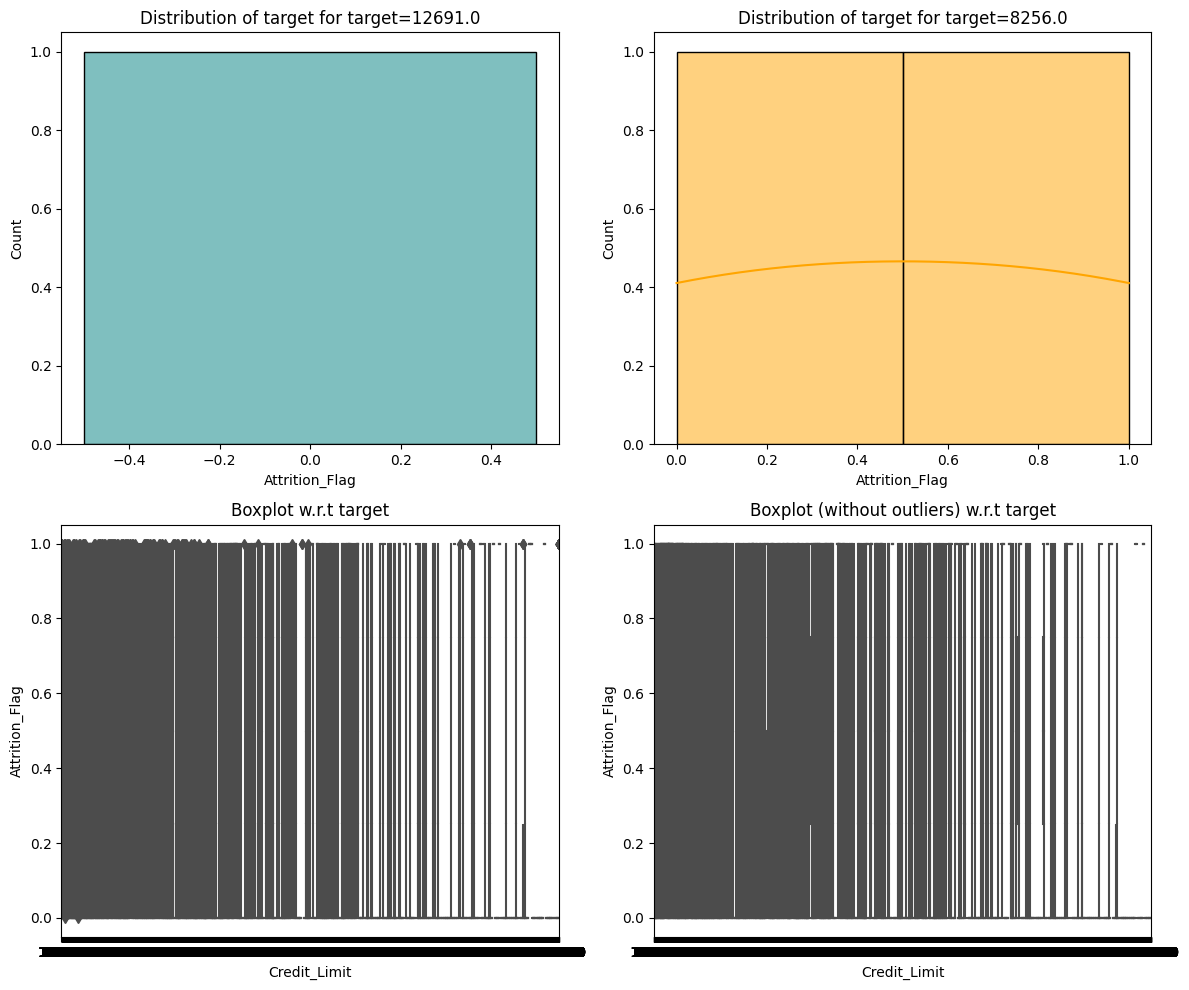

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Credit_Limit") ## Code to create distribution_plot for Attrition_Flag vs Credit_Limit

`Attrition_Flag vs Customer_Age`

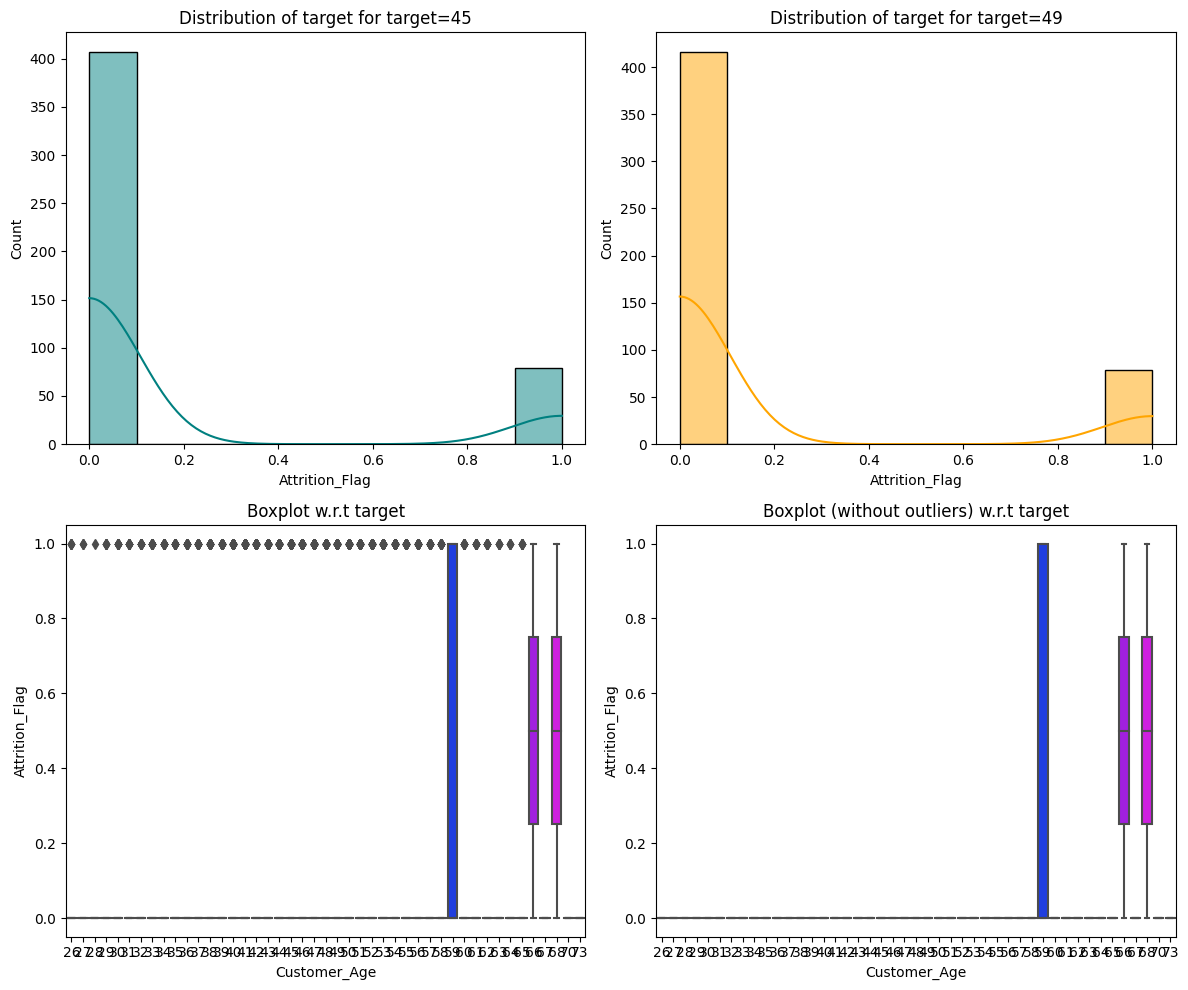

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Customer_Age") ## Code to create distribution_plot for Attrition_Flag vs Customer_Age

`Total_Trans_Ct` vs `Attrition_Flag`

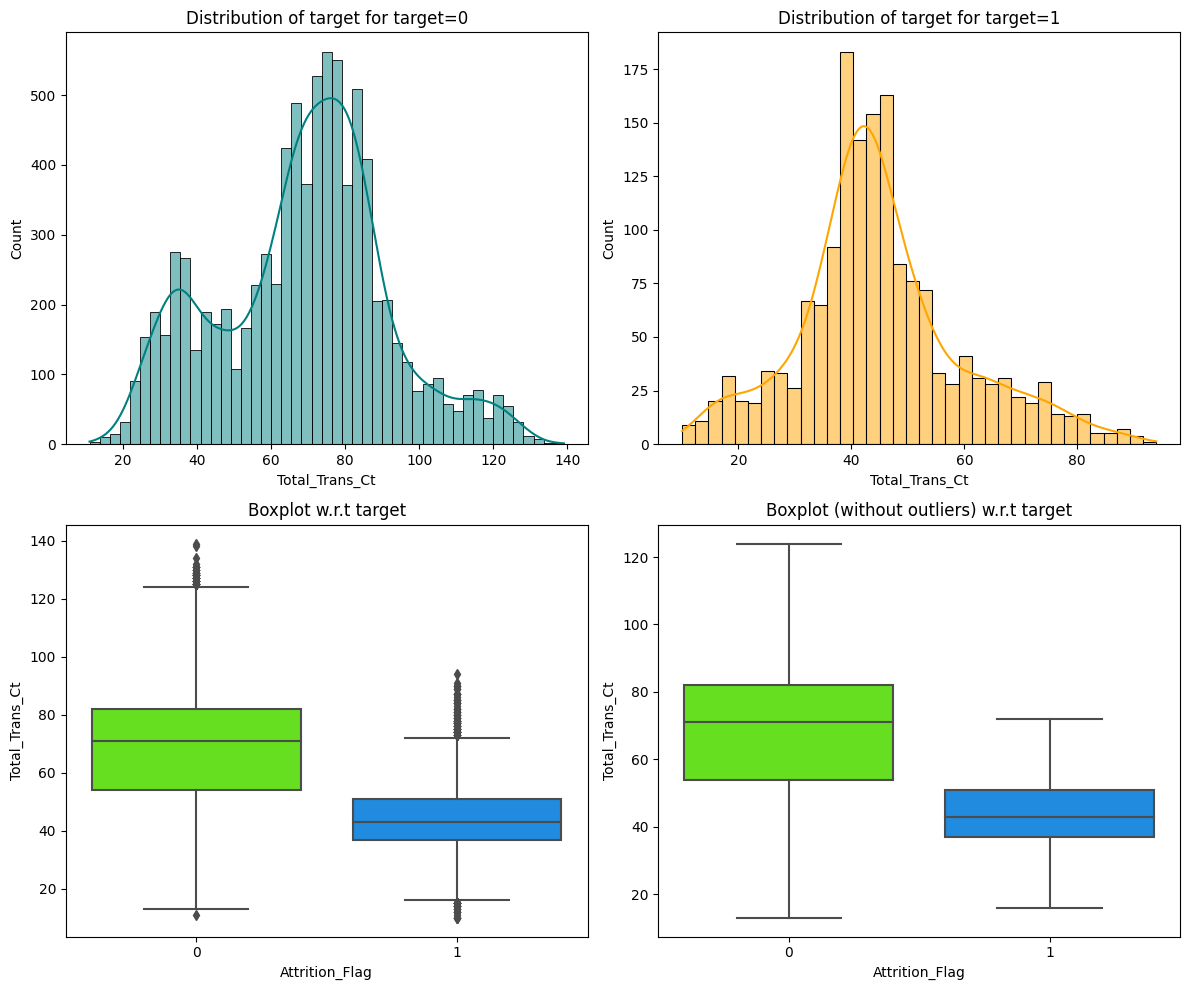

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag") ## Code to create distribution_plot for Total_Trans_Ct vs Attrition_Flag

`Total_Trans_Amt` vs `Attrition_Flag`

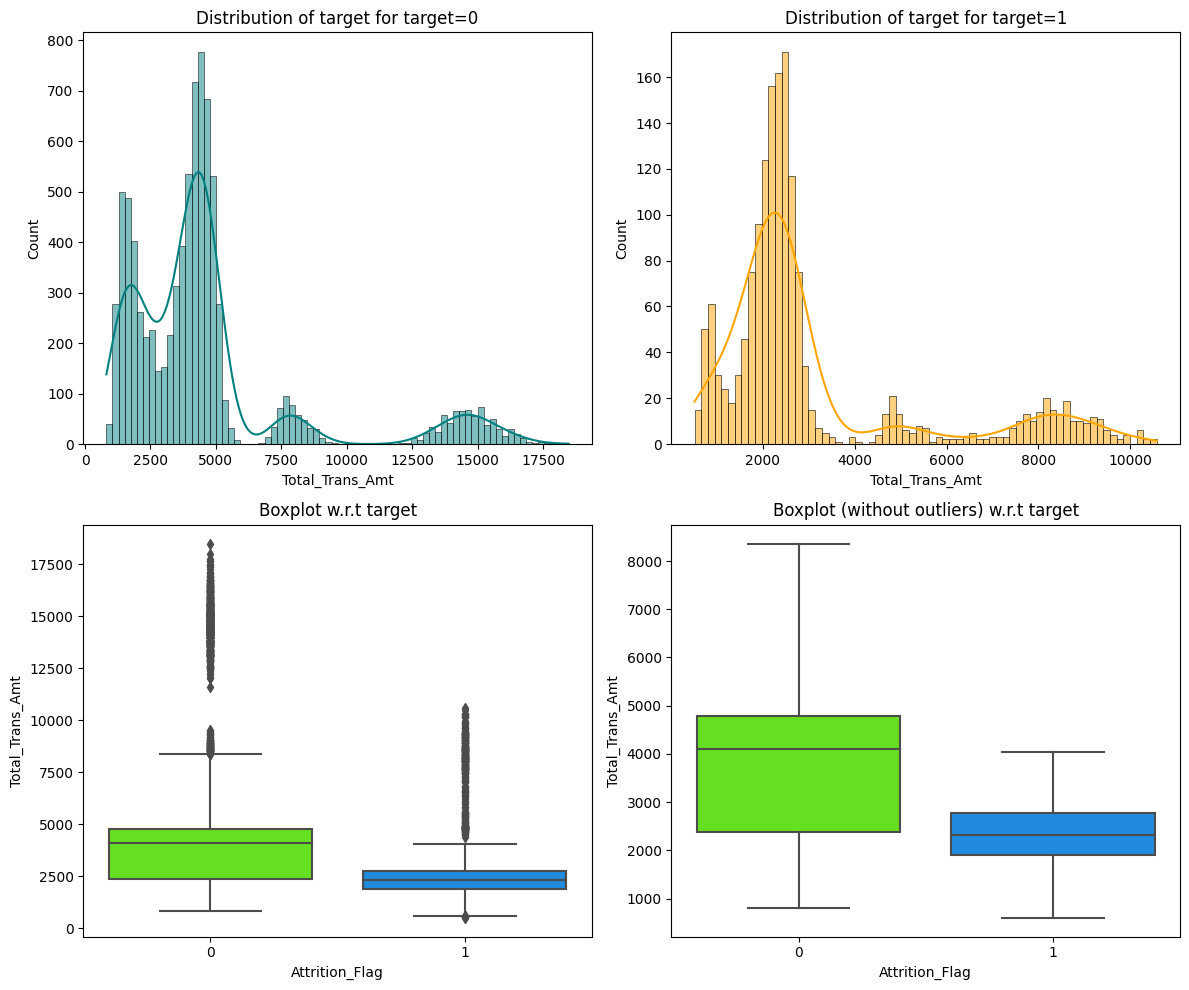

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag") ## Code to create distribution_plot for Total_Trans_Amt vs Attrition_Flag

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

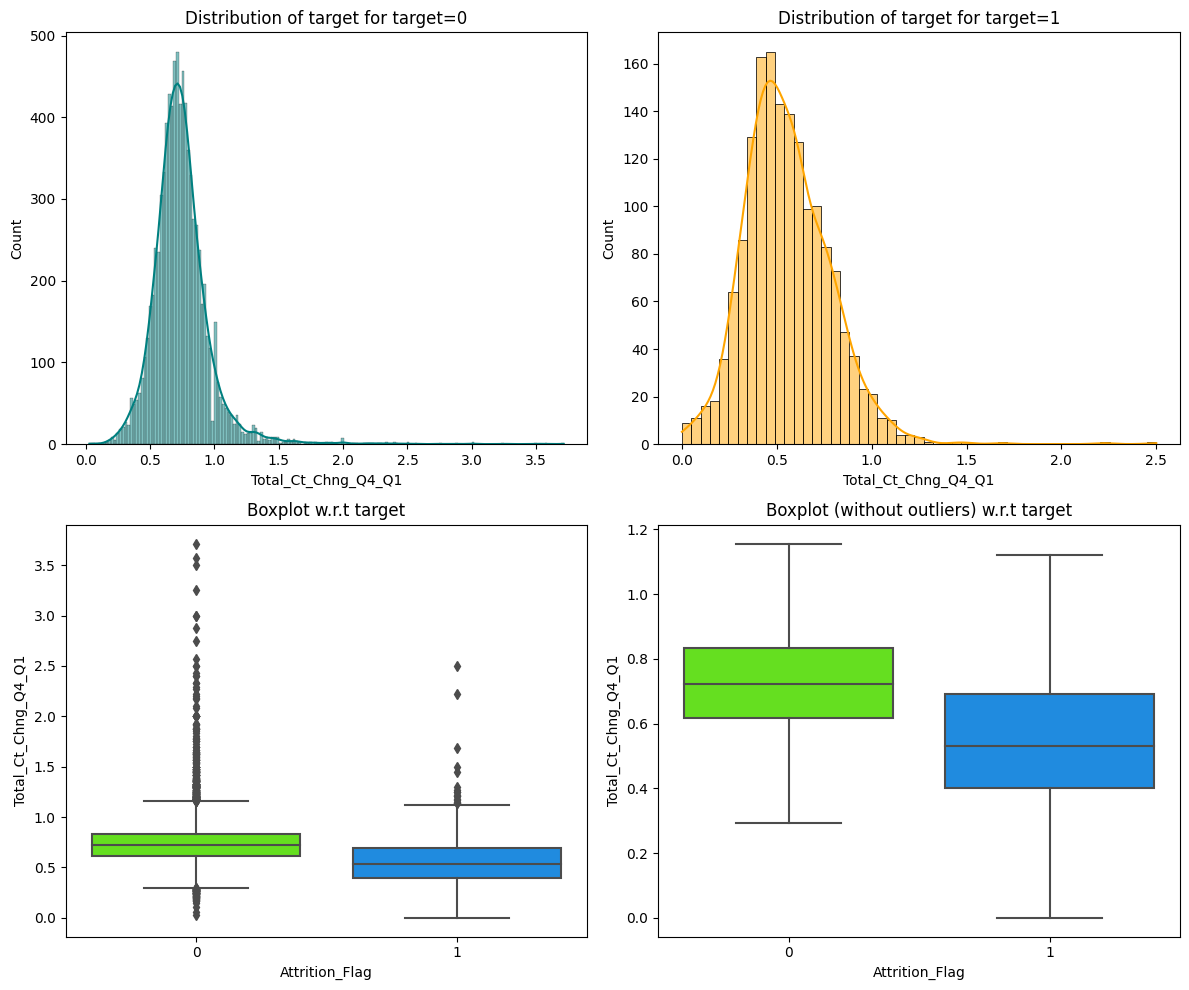

In [ ]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag") ## Code to create distribution_plot for Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

`Avg_Utilization_Ratio` vs `Attrition_Flag`

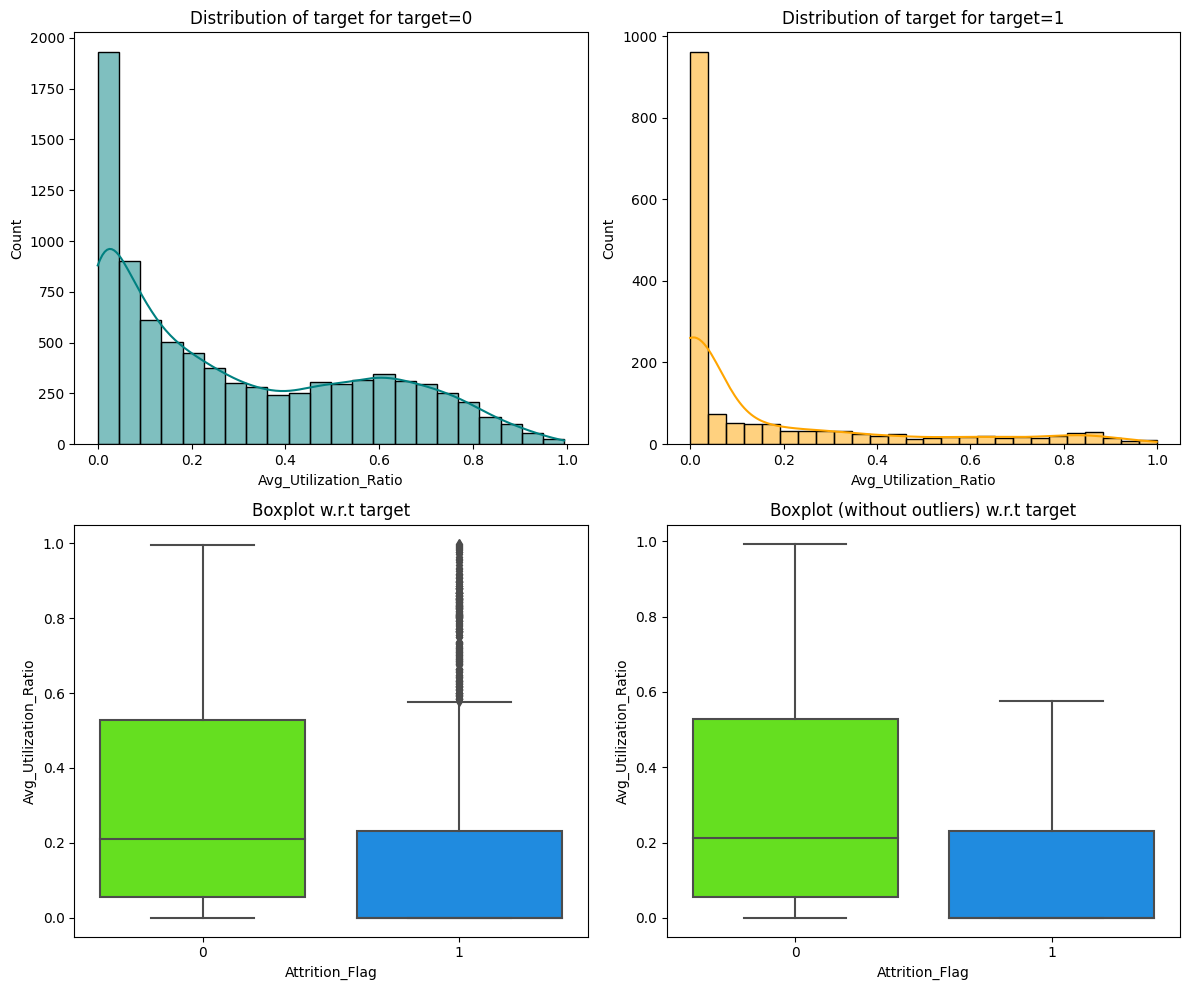

In [ ]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag") ## Code to create distribution_plot for Avg_Utilization_Ratio vs Attrition_Flag


`Attrition_Flag vs Months_on_book`

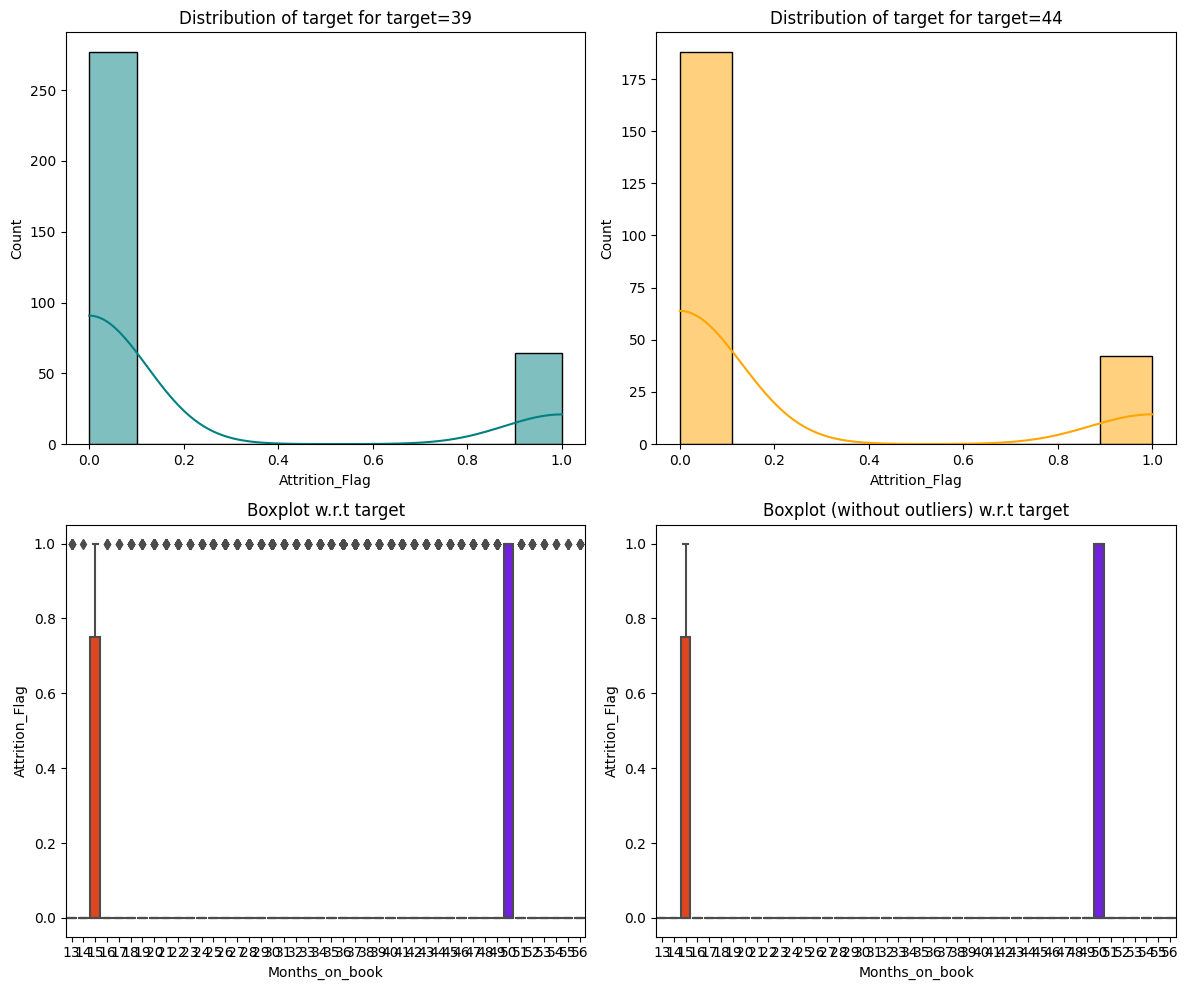

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Months_on_book") ## Code to create distribution_plot for Attrition_Flag vs Months_on_book

`Attrition_Flag vs Total_Revolving_Bal`

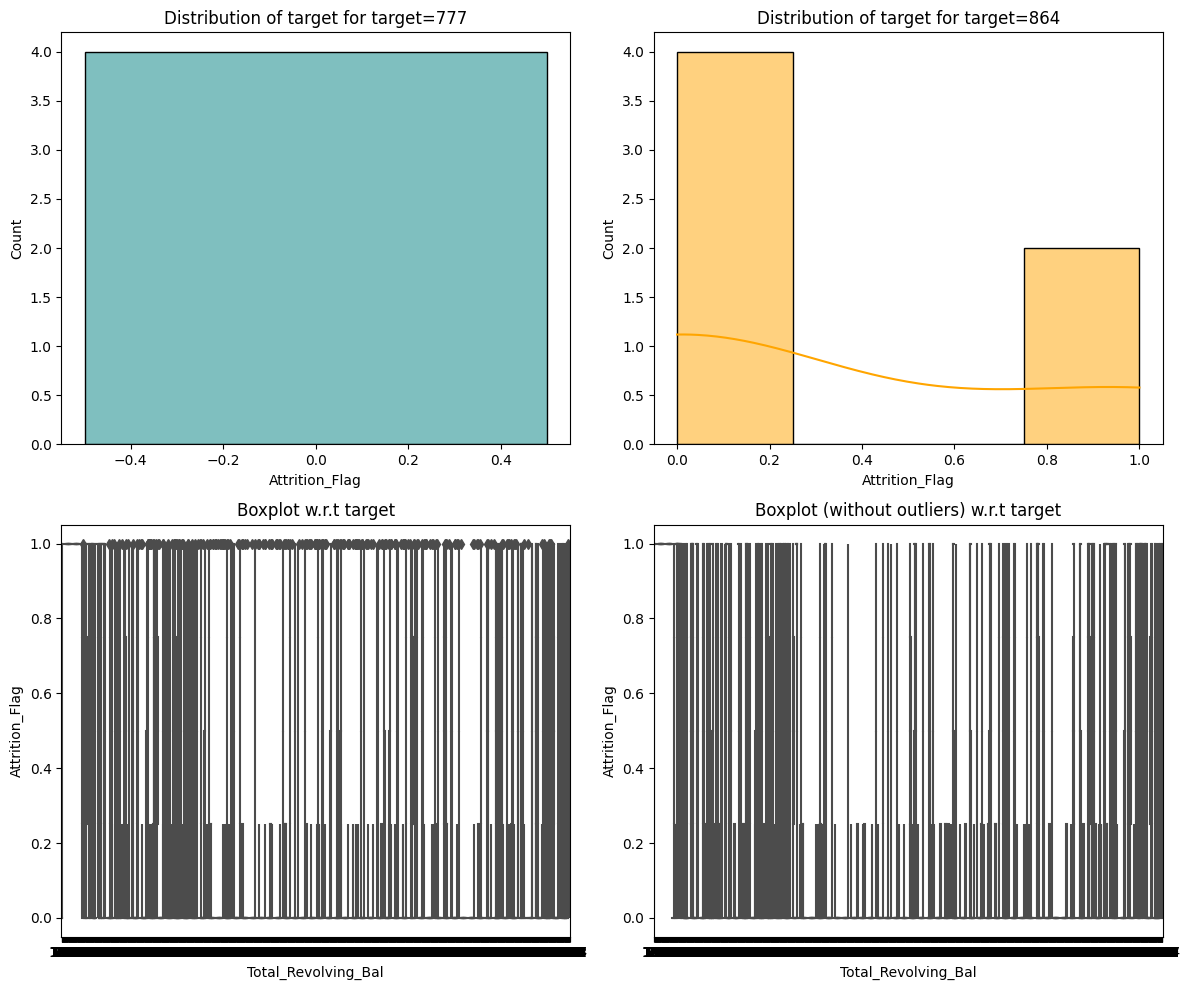

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Total_Revolving_Bal") ## Code to create distribution_plot for Attrition_Flag vs Total_Revolving_Bal

`Attrition_Flag vs Avg_Open_To_Buy`

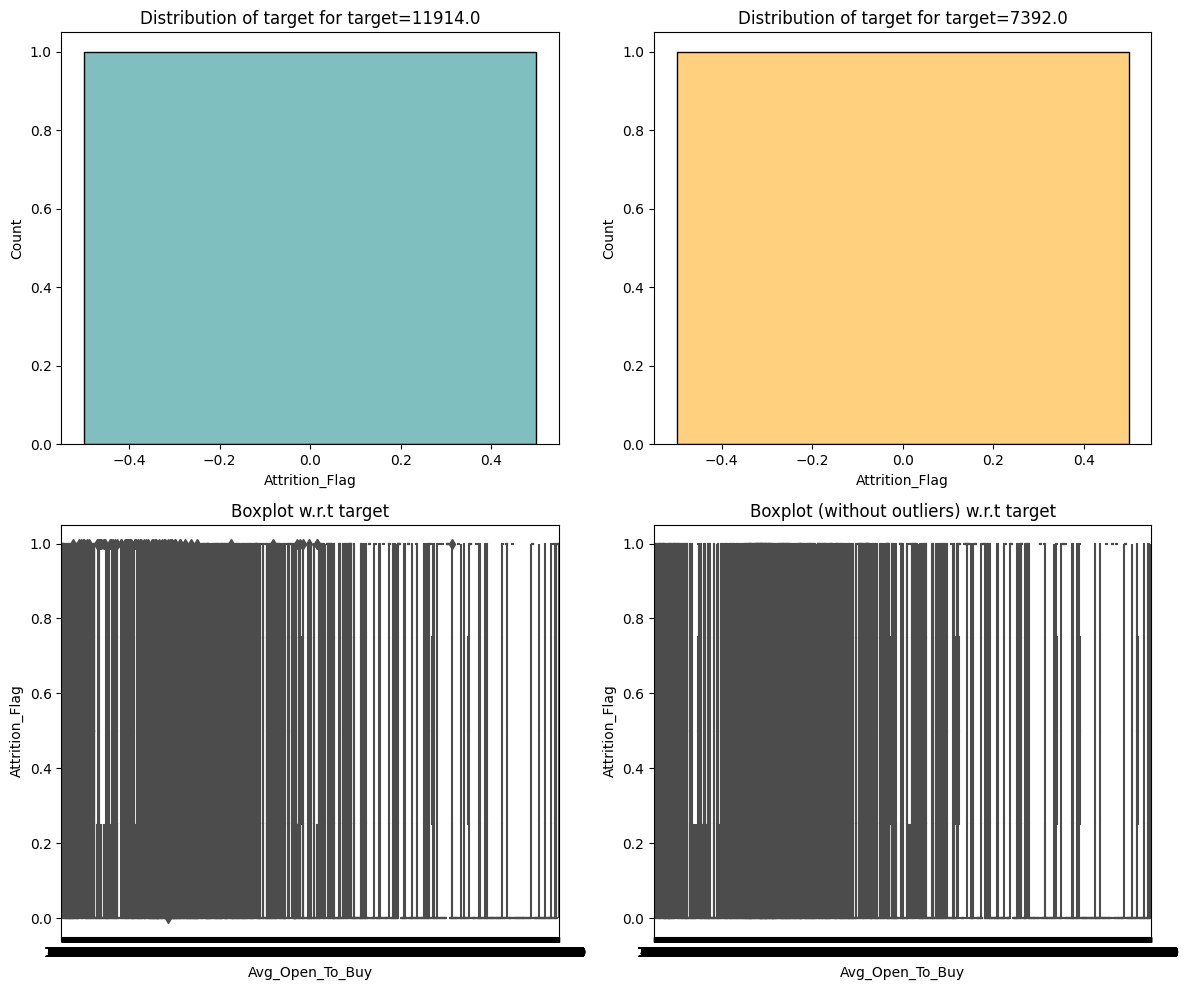

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Avg_Open_To_Buy") ## Code to create distribution_plot for Attrition_Flag vs Avg_Open_To_Buy

## Data Preprocessing

### Outlier Detection

In [ ]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

### Train-Test Split

In [ ]:
# creating the copy of the dataframe
data1 = data.copy()

In [ ]:
data1["Income_Category"].replace("Unknown", np.nan, inplace=True) ### Code to replace the anomalous values with NaN

In [ ]:
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
# Splitting data into training and validation set:

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=1) ## Code to split the data into train test in the ratio 80:20

# X_val, X_test, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1) ## Code to split the data into train test in the ratio 75:25

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) ## Code to split the data into train test in the ratio 80:20

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0, stratify=y_temp) ## Code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


(8101, 19) (1519, 19) (507, 19)
(8101,) (1519,) (507,)


### Missing value imputation

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute]  =  imputer.fit_transform(X_val[reqd_col_for_impute]) ## Code to impute missing values in X_val

# Transform the test data
X_test[reqd_col_for_impute] = imputer.fit_transform(X_test[reqd_col_for_impute]) ## Code to impute missing values in X_test

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    4286
M    3815
Name: Gender, dtype: int64
******************************
Graduate         3707
High School      1619
Uneducated       1202
College           808
Post-Graduate     410
Doctorate         355
Name: Education_Level, dtype: int64
******************************
Married     4349
Single      3141
Divorced     611
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2862
$40K - $60K       1372
$80K - $120K      1226
$60K - $80K       1159
abc                902
$120K +            580
Name: Income_Category, dtype: int64
******************************
Blue        7551
Silver       435
Gold          98
Platinum      17
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    826
M    693
Name: Gender, dtype: int64
******************************
Graduate         719
High School      288
Uneducated       213
College          153
Post-Graduate     76
Doctorate         70
Name: Education_Level, dtype: int64
******************************
Married     813
Single      599
Divorced    107
Name: Marital_Status, dtype: int64
******************************
Less than $40K    540
$40K - $60K       312
$80K - $120K      217
$60K - $80K       176
abc               167
$120K +           107
Name: Income_Category, dtype: int64
******************************
Blue        1411
Silver        95
Gold          10
Platinum       3
Name: Card_Category, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    4286
M    3815
Name: Gender, dtype: int64
******************************
Graduate         3707
High School      1619
Uneducated       1202
College           808
Post-Graduate     410
Doctorate         355
Name: Education_Level, dtype: int64
******************************
Married     4349
Single      3141
Divorced     611
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2862
$40K - $60K       1372
$80K - $120K      1226
$60K - $80K       1159
abc                902
$120K +            580
Name: Income_Category, dtype: int64
******************************
Blue        7551
Silver       435
Gold          98
Platinum      17
Name: Card_Category, dtype: int64
******************************


### Encoding categorical variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)  ## Code to impute missing values in X_val
X_test = pd.get_dummies(X_test, drop_first=True)  ## Code to impute missing values in X_val
print(X_train.shape, X_val.shape, X_test.shape)


(8101, 30) (1519, 30) (507, 29)


In [ ]:
# Manually drop the "Card_Category_Platinum" column
X_train.drop("Card_Category_Platinum", axis=1, inplace=True)
X_val.drop("Card_Category_Platinum", axis=1, inplace=True)
# X_test.drop("Card_Category_Platinum", axis=1, inplace=True)

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 29) (1519, 29) (507, 29)


* After encoding there are 29 columns.

In [ ]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Silver
9893,42,3,36,6,1,2,15648.000,0,15648.000,0.731,13784,88,0.913,0.000,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
6611,36,2,36,3,2,1,14304.000,699,13605.000,0.549,4746,73,0.521,0.049,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3334,50,1,39,4,1,1,2421.000,1029,1392.000,0.675,2377,56,0.750,0.425,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
5987,63,1,55,6,1,2,21430.000,0,21430.000,0.511,3561,57,0.676,0.000,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1725,39,2,36,3,2,4,9843.000,2154,7689.000,0.733,1402,35,0.667,0.219,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

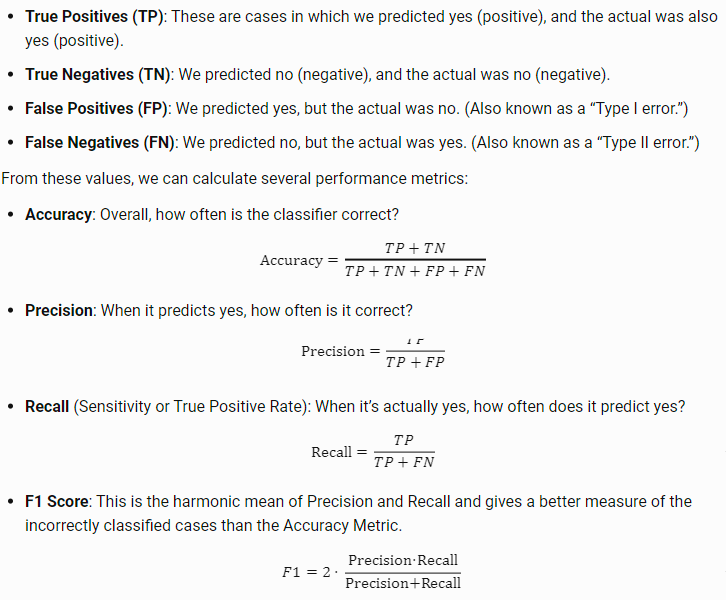

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoostClassifier", AdaBoostClassifier(random_state=1)))## Code to append remaining 3 models in the list models
models.append(("GradientBoostingClassifier", GradientBoostingClassifier(random_state=1)))
models.append(("XGBClassifier", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9823348694316436
Random forest: 1.0
AdaBoostClassifier: 0.8609831029185868
GradientBoostingClassifier: 0.8863287250384024
XGBClassifier: 1.0

Validation Performance:

Bagging: 0.7745901639344263
Random forest: 0.8032786885245902
AdaBoostClassifier: 0.8524590163934426
GradientBoostingClassifier: 0.8401639344262295
XGBClassifier: 0.9057377049180327


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
import numpy as np

# Undersampling
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoostClassifier", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoostingClassifier", GradientBoostingClassifier(random_state=1)))
models.append(("XGBClassifier", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  # Code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights and biases
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5,
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5,
                                       (self.hidden_nodes, self.output_nodes))
        self.bias_hidden = np.zeros(self.hidden_nodes)
        self.bias_output = np.zeros(self.output_nodes)

    def forward_pass(self, X):
        ''' Forward pass through the network.
            X is the input data.
            Returns: final_outputs, the output of the last layer
        '''
        ### Forward pass ###
        # Hidden layer
        hidden_inputs = np.dot(X, self.weights_input_to_hidden) + self.bias_hidden # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer

        # Output layer
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) + self.bias_output # signals into final output layer
        final_outputs = final_inputs # signals from final output layer

        print("Weights from input to hidden:", self.weights_input_to_hidden)  # Print the weights from input to hidden layer
        print("Weights from hidden to output:", self.weights_hidden_to_output)  # Print the weights from hidden to output layer
        return final_outputs

    def activation_function(self, x):
        """ Sigmoid activation function

            Arguments
            ---------
            x: numpy array. Element-wise activation applied to this array.

            Returns
            -------
            res: numpy array. Element-wise sigmoid of x.
        """
        return 1/(1+np.exp(-x))

# Create a NeuralNetwork object
nn = NeuralNetwork(input_nodes=3, hidden_nodes=4, output_nodes=1)

# Example input
X = np.array([0.5, 0.1, -0.2])
output = nn.forward_pass(X)

print(output)



Training Performance:

Bagging: 0.9930875576036866
Random forest: 1.0
AdaBoostClassifier: 0.9600614439324117
GradientBoostingClassifier: 0.9792626728110599
XGBClassifier: 1.0

Validation Performance:

Bagging: 0.9098360655737705
Random forest: 0.9549180327868853
AdaBoostClassifier: 0.9385245901639344
GradientBoostingClassifier: 0.9385245901639344
XGBClassifier: 0.9672131147540983
Weights from input to hidden: [[ 0.41423302  0.77754258 -0.18858601 -0.73983129]
 [ 0.28026567  0.11063002 -0.37148237  0.44675906]
 [-0.66068526  0.17917106  0.01611377 -0.71079147]]
Weights from hidden to output: [[-0.12576756]
 [-0.12432614]
 [ 0.37118952]
 [-0.27505598]]
[-0.09951363]


### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1302
Before Oversampling, counts of label 'No': 6799 

After Oversampling, counts of label 'Yes': 6799
After Oversampling, counts of label 'No': 6799 

After Oversampling, the shape of train_X: (13598, 29)
After Oversampling, the shape of train_y: (13598,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoostClassifier", AdaBoostClassifier(random_state=1)))## Code to append remaining 3 models in the list models
models.append(("GradientBoostingClassifier", GradientBoostingClassifier(random_state=1)))
models.append(("XGBClassifier", XGBClassifier(random_state=1)))



print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))  ## Code to build models on oversampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.998529195469922
Random forest: 1.0
AdaBoostClassifier: 0.9704368289454331
GradientBoostingClassifier: 0.9804382997499632
XGBClassifier: 1.0

Validation Performance:

Bagging: 0.8237704918032787
Random forest: 0.8483606557377049
AdaBoostClassifier: 0.8483606557377049
GradientBoostingClassifier: 0.8729508196721312
XGBClassifier: 0.8852459016393442


### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1302
Before Under Sampling, counts of label 'No': 6799 

After Under Sampling, counts of label 'Yes': 1302
After Under Sampling, counts of label 'No': 1302 

After Under Sampling, the shape of train_X: (2604, 29)
After Under Sampling, the shape of train_y: (2604,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoostClassifier", AdaBoostClassifier(random_state=1)))## Code to append remaining 3 models in the list models
models.append(("GradientBoostingClassifier", GradientBoostingClassifier(random_state=1)))
models.append(("XGBClassifier", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  ## Code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9930875576036866
Random forest: 1.0
AdaBoostClassifier: 0.9600614439324117
GradientBoostingClassifier: 0.9792626728110599
XGBClassifier: 1.0

Validation Performance:

Bagging: 0.9098360655737705
Random forest: 0.9549180327868853
AdaBoostClassifier: 0.9385245901639344
GradientBoostingClassifier: 0.9385245901639344
XGBClassifier: 0.9672131147540983


In [ ]:
# Create a NeuralNetwork object
nn = NeuralNetwork(input_nodes=3, hidden_nodes=4, output_nodes=1)

# Example input
X = np.array([0.5, 0.1, -0.2])
output = nn.forward_pass(X)

print(output)


Weights from input to hidden: [[ 0.05041708  0.65606586 -0.73490498 -0.9822428 ]
 [ 0.3823159   0.87806251  0.17896581 -0.23791972]
 [ 0.21814998 -0.89553435 -0.47388832  0.14439926]]
Weights from hidden to output: [[ 0.23729233]
 [-0.78116313]
 [ 0.05079801]
 [ 0.40675442]]
[-0.21205366]


In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights and biases
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5,
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5,
                                       (self.hidden_nodes, self.output_nodes))
        self.bias_hidden = np.zeros(self.hidden_nodes)
        self.bias_output = np.zeros(self.output_nodes)

    def forward_pass(self, X):
        ''' Forward pass through the network.
            X is the input data.
            Returns: final_outputs, the output of the last layer
        '''
        ### Forward pass ###
        # Hidden layer
        hidden_inputs = np.dot(X, self.weights_input_to_hidden) + self.bias_hidden # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer

        # Output layer
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) + self.bias_output # signals into final output layer
        final_outputs = final_inputs # signals from final output layer

        print("Final Outputs:", final_outputs)  # Print the final outputs
        return final_outputs

    def activation_function(self, x):
        """ Sigmoid activation function

            Arguments
            ---------
            x: numpy array. Element-wise activation applied to this array.

            Returns
            -------
            res: numpy array. Element-wise sigmoid of x.
        """
        return 1/(1+np.exp(-x))


In [ ]:
def forward_pass(self, X):
    ''' Forward pass through the network.
        X is the input data.
        Returns: final_outputs, the output of the last layer
    '''
    ### Forward pass ###
    # Hidden layer
    hidden_inputs = np.dot(X, self.weights_input_to_hidden) + self.bias_hidden # signals into hidden layer
    hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer

    print("Hidden Outputs:", hidden_outputs)  # Print the hidden layer outputs

    # Output layer
    final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) + self.bias_output # signals into final output layer
    final_outputs = final_inputs # signals from final output layer

    print("Final Outputs:", final_outputs)  # Print the final outputs
    return final_outputs


### Hyperparameter Tuning

#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using original data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8740406719717064:
CPU times: user 4.81 s, sys: 527 ms, total: 5.33 s
Wall time: 2min 15s


#### Tuning Ada Boost using undersampled data

In [ ]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Code with the best parameters obtained from tuning

tuned_ada2.fit(X_train_un, y_train_un) ## Code to fit the model on undersampled data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
adb2_train = model.score(X_train,y_train) ## Code to check the performance on training set
adb2_train

0.9607455869645722

In [ ]:
# Checking model's performance on validation set
adb2_val =  model.score(X_val,y_val) ## Code to check the performance on validation set
adb2_val

0.9499670836076366

#### Tuning Gradient Boosting using undersampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Code to fit the model on under sampled data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9592926613616267:
CPU times: user 2.78 s, sys: 235 ms, total: 3.02 s
Wall time: 1min 26s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)## Code with the best parameters obtained from tuning

tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
gbm1_train = model.score(X_train_un,y_train_un) ## Code to check the performance on undersampled train set
gbm1_train

1.0

In [ ]:
gbm1_val = model.score(X_val,y_val) ## Code to check the performance on validation set
gbm1_val

0.9499670836076366

#### Tuning Gradient Boosting using original data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8287002652519894:
CPU times: user 5.29 s, sys: 562 ms, total: 5.85 s
Wall time: 3min 22s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)## Code with the best parameters obtained from tuning

tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

#### Tuning Gradient Boosting using over sampled data

In [ ]:
gbm2_train = model.score(X_train_over,y_train_over) ## Code to check the performance on oversampled train set
gbm2_train

0.9723488748345345

In [ ]:
gbm2_val = model.score(X_val,y_val) ## Code to check the performance on validation set
gbm2_val

0.9499670836076366

#### Tuning XGBoost Model with Original data

**Note**: This section is optional. You can choose not to build XGBoost if you are facing issues with installation or if it is taking more time to execute.



In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9401031535514294:
CPU times: user 2.8 s, sys: 295 ms, total: 3.1 s
Wall time: 1min 11s


In [ ]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=75,
    learning_rate=0.05,
    gamma=3, ##original gamma value was 1
)## Code with the best parameters obtained from tuning.
## Tuning said that gamma was 3 but low code is saying that it is 1.

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_train = model.score(X_train, y_train) ## Code to check the performance on original train set
xgb_train

0.9607455869645722

In [ ]:
xgb_val = model.score(X_val, y_val) ## Code to check the performance on validation set
xgb_val

0.9499670836076366

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights and biases
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5,
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5,
                                       (self.hidden_nodes, self.output_nodes))
        self.bias_hidden = np.zeros(self.hidden_nodes)
        self.bias_output = np.zeros(self.output_nodes)

    def forward_pass(self, X):
        ''' Forward pass through the network.
            X is the input data.
            Returns: final_outputs, the output of the last layer
        '''
        ### Forward pass ###
        # Hidden layer
        hidden_inputs = np.dot(X, self.weights_input_to_hidden) + self.bias_hidden # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer

        # Output layer
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) + self.bias_output # signals into final output layer
        final_outputs = final_inputs # signals from final output layer

        print("Final Outputs:", final_outputs)  # Print the final outputs
        return final_outputs

    def activation_function(self, x):
        """ Sigmoid activation function

            Arguments
            ---------
            x: numpy array. Element-wise activation applied to this array.

            Returns
            -------
            res: numpy array. Element-wise sigmoid of x.
        """
        return 1/(1+np.exp(-x))


## Model Comparison and Final Model Selection

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights and biases
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5,
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5,
                                       (self.hidden_nodes, self.output_nodes))
        self.bias_hidden = np.zeros(self.hidden_nodes)
        self.bias_output = np.zeros(self.output_nodes)

    def forward_pass(self, X):
        ''' Forward pass through the network.
            X is the input data.
            Returns: final_outputs, the output of the last layer
        '''
        ### Forward pass ###
        # Hidden layer
        hidden_inputs = np.dot(X, self.weights_input_to_hidden) + self.bias_hidden # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer

        # Output layer
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) + self.bias_output # signals into final output layer
        final_outputs = final_inputs # signals from final output layer

        print("Final Outputs:", final_outputs)  # Print the final outputs
        return final_outputs

    def activation_function(self, x):
        """ Sigmoid activation function

            Arguments
            ---------
            x: numpy array. Element-wise activation applied to this array.

            Returns
            -------
            res: numpy array. Element-wise sigmoid of x.
        """
        return 1/(1+np.exp(-x))


**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [ ]:
gbm1_train.T

1.0

In [ ]:
gbm2_train.T

0.9723488748345345

In [ ]:
xgb_train.T

0.9607455869645722

In [ ]:
print(type(gbm1_train))
print(type(gbm2_train))
print(type(adb2_train))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [ ]:
gbm1_train = pd.Series(gbm1_train)

In [ ]:
gbm2_train = pd.Series(gbm2_train)

In [ ]:
gbm3_train = pd.Series(adb2_train.T)

In [ ]:
gbm1_train = pd.DataFrame([gbm1_train])
gbm2_train = pd.DataFrame([gbm2_train])
adb2_train = pd.DataFrame([adb2_train])


In [ ]:
models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
print(models_train_comp_df)


Training performance comparison:
   Gradient boosting trained with Undersampled data  \
0                                             1.000   

   Gradient boosting trained with Original data  \
0                                         0.972   

   AdaBoost trained with Undersampled data  
0                                    0.961  


In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate

# validation performance comparison

## Write the code to compare the performance on validation set

print("\nTraining and Validation Performance Difference:\n")

table = []

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    table.append([name, scores_train, scores_val, difference2])

print(tabulate(table, headers=["Model", "Training Score", "Validation Score", "Difference"], tablefmt='pretty'))



Training and Validation Performance Difference:

+----------------------------+--------------------+--------------------+---------------------+
|           Model            |   Training Score   |  Validation Score  |     Difference      |
+----------------------------+--------------------+--------------------+---------------------+
|          Bagging           | 0.998529195469922  | 0.8237704918032787 | 0.17475870366664337 |
|       Random forest        |        1.0         | 0.8483606557377049 | 0.15163934426229508 |
|     AdaBoostClassifier     | 0.9704368289454331 | 0.8483606557377049 | 0.12207617320772823 |
| GradientBoostingClassifier | 0.9804382997499632 | 0.8729508196721312 | 0.10748748007783204 |
|       XGBClassifier        |        1.0         | 0.8852459016393442 | 0.11475409836065575 |
+----------------------------+--------------------+--------------------+---------------------+


In [ ]:
from IPython.display import display, HTML
from tabulate import tabulate

# validation performance comparison

## Write the code to compare the performance on validation set

print("\nTraining and Validation Performance Difference:\n")

table = []

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    table.append([name, scores_train, scores_val, difference2])

display(HTML(tabulate(table, headers=["Model", "Training Score", "Validation Score", "Difference"], tablefmt='html')))


Training and Validation Performance Difference:



Model,Training Score,Validation Score,Difference
Bagging,0.998529,0.82377,0.174759
Random forest,1,0.848361,0.151639
AdaBoostClassifier,0.970437,0.848361,0.122076
GradientBoostingClassifier,0.980438,0.872951,0.107487
XGBClassifier,1,0.885246,0.114754


**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
# Let's check the performance on test set
## Write the code to check the performance of best model on test data
# Let's check the performance on test set

ada_test = model_performance_classification_sklearn(tuned_ada2, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.957,0.889,0.847,0.867


In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
0,1.000,0.972,0.961


### Feature Importances

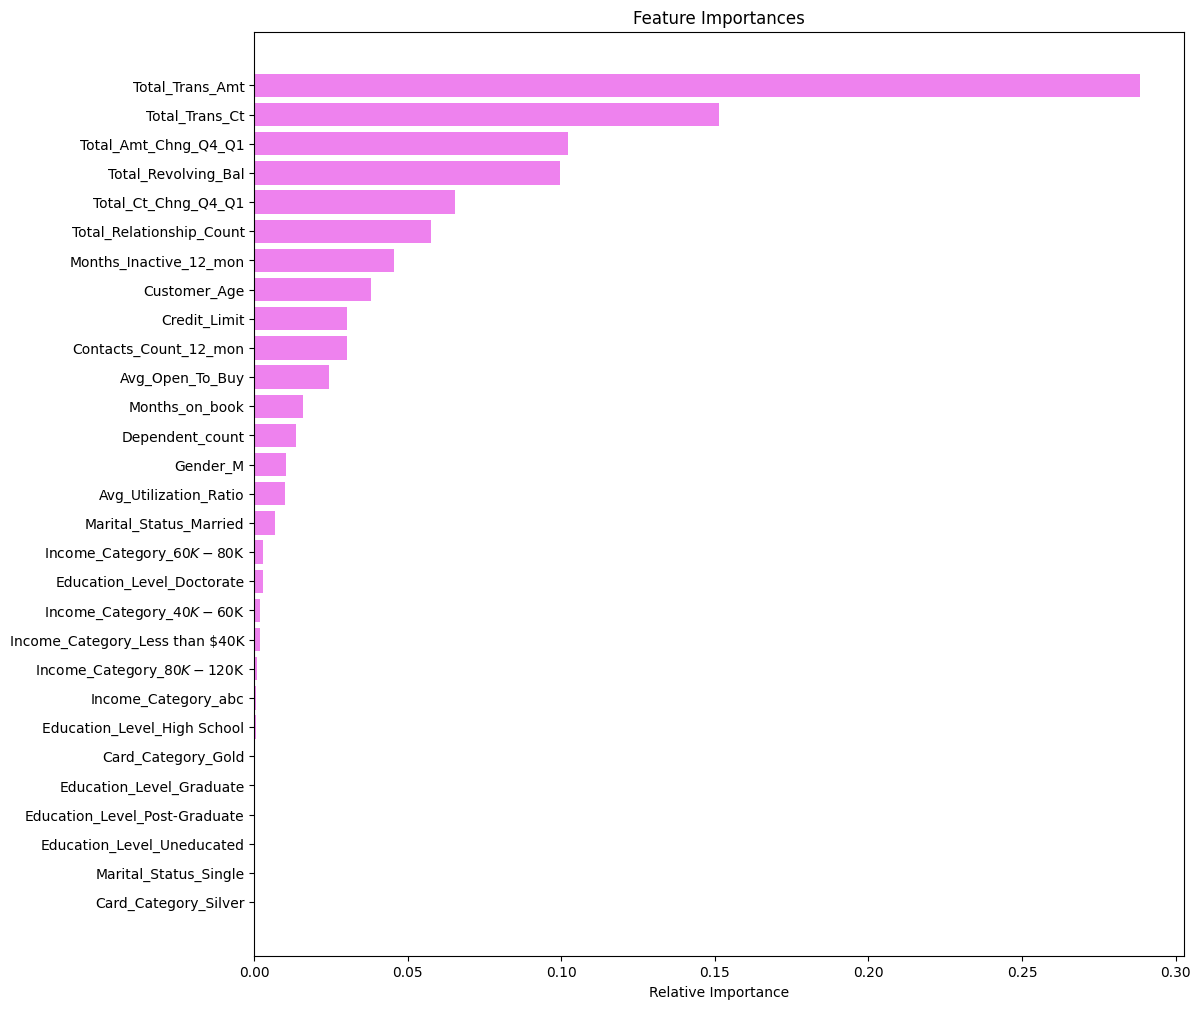

In [ ]:
#feature_names = X_train.columns
#importances ## Code to check the feature importance of the best model

feature_names = X_train.columns
importances = tuned_ada2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

-


***